## GOAL: Make summary plots of CNV types of cells

In [1]:
cell_set_to_use="alexej_style_qc_25pct_20cnv"

cell_set_files=list("joe_qc"="../notebooks_high-depth-CS_filter/joe_qc_cells.rds",
                    "alexej_style_qc_10pct_30cnv"="cells_passing_10pct_30cnv.rds",
                    "alexej_style_qc_25pct_10cnv"="cells_passing_25pct_10cnv.rds",
                    "alexej_style_qc_25pct_20cnv"="cells_passing_25pct_20cnv.rds"
                   )

In [2]:
length_filter=NULL

In [3]:
output_dir="cnv_summary_plots"

## Load in data

In [4]:
library("Cairo")

Warning message:
“package ‘Cairo’ was built under R version 4.4.3”


In [5]:
source("../notebooks_filter/utils_high-depth.R")

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb


Attaching package: ‘data.table’


The fo

In [6]:
# ----------------------------
# SET FIXED PARAMETERS
# ----------------------------
prefix <- "/n/data1/hms/dbmi/park/ann_caplin/SMaHT/PTA"
#batch_names <- c("batch-6-uniform_lung", "batch-7-uniform_colon")
batch_names <- c("batch-6-uniform_lung", "batch-7-uniform_colon")
batch_name_list <- c("lung"="batch-6-uniform_lung", "colon"="batch-7-uniform_colon")
binsize <- "500000"
lambda_str <- "1024-512"
lambda <- 512
hiscanner_cell_type_ix=3

In [7]:
cytoband_df <- read.table("refs/hg38_cytoBand.txt", header = FALSE, sep = "\t", stringsAsFactors = FALSE)
colnames(cytoband_df) <- c("chrom", "start", "end", "name", "gieStain")

# Extract chromosome arm
cytoband_df$arm <- substr(cytoband_df$name, 1, 1)  # "p" or "q"
cytoband_df$chrom <- sub("^chr", "", cytoband_df$chrom)

In [8]:
cytoband_df

chrom,start,end,name,gieStain,arm
<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,0,2300000,p36.33,gneg,p
1,2300000,5300000,p36.32,gpos25,p
1,5300000,7100000,p36.31,gneg,p
1,7100000,9100000,p36.23,gpos25,p
1,9100000,12500000,p36.22,gneg,p
1,12500000,15900000,p36.21,gpos50,p
1,15900000,20100000,p36.13,gneg,p
1,20100000,23600000,p36.12,gpos25,p
1,23600000,27600000,p36.11,gneg,p


In [9]:
chrom_arm_df <- cytoband_df %>% filter(chrom %in% c(1:22, "X", "Y")) %>% group_by(chrom, arm) %>% summarize(start=min(start), end=max(end), arm=arm[1])

`summarise()` has grouped output by 'chrom'. You can override using the
`.groups` argument.


In [10]:
head(chrom_arm_df)

chrom,arm,start,end
<chr>,<chr>,<int>,<int>
1,p,0,123400000
1,q,123400000,248956422
10,p,0,39800000
10,q,39800000,133797422
11,p,0,53400000
11,q,53400000,135086622


In [11]:
cell_data <- read_rds("../notebooks_high-depth-CS_filter/cell_data_df_NBIN-filtered_20.rds")

In [12]:
seg_merged_data <- read_rds("../notebooks_high-depth-CS_filter/seg_merged_df_NBIN-filtered_20.rds")

In [13]:
seg_merged_data$CN_total <- NA

seg_merged_data$CN <- as.character(seg_merged_data$CN)

# Split CN into two numeric components
cn_split <- str_split(seg_merged_data$CN, "\\|")

# Extract alleles as numeric values
seg_merged_data$CN_A <- as.numeric(sapply(cn_split, `[`, 1))
seg_merged_data$CN_B <- as.numeric(sapply(cn_split, `[`, 2))

# Compute total copy number
sex_chr_mask <- seg_merged_data$chrom %in% c("X", "Y")
seg_merged_data$CN_A[sex_chr_mask & is.na(seg_merged_data$CN_A)] <- 0
seg_merged_data$CN_B[sex_chr_mask & is.na(seg_merged_data$CN_B)] <- 0

seg_merged_data$CN_total <- seg_merged_data$CN_A + seg_merged_data$CN_B
 
#seg_merged_data$CN_total[seg_merged_data$chrom %in% c("X", "Y")] <- as.integer(seg_merged_data$CN[seg_merged_data$chrom %in% c("X", "Y")])
seg_merged_data$is_LOH <- (seg_merged_data$chrom %in% c(1:22)) & (seg_merged_data$CN_A == 0 | seg_merged_data$CN_B == 0)
seg_merged_data$is_CNV <- (seg_merged_data$chrom %in% c(1:22)) & (seg_merged_data$CN != "1|1")
seg_merged_data$length <- seg_merged_data$end - seg_merged_data$start
seg_merged_data$is_gain <- (seg_merged_data$chrom %in% c(1:22)) & seg_merged_data$CN_total>2
seg_merged_data$is_loss <- (seg_merged_data$chrom %in% c(1:22)) & seg_merged_data$CN_total<2

In [14]:
head(seg_merged_data)

start,end,CN,chrom,NBIN,RDR_SUM,RDR_MEAN,VAF_MEAN,VAF_ESTIMATE,sample,⋯,batch_name,cell_type,CN_total,CN_A,CN_B,is_LOH,is_CNV,length,is_gain,is_loss
<int>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<int>,<lgl>,<lgl>
10033,248946312,1|1,1,420,585.7719,1.394695,1.2549245,NA,ST002,⋯,batch-6-uniform_lung,lung,2,1,1,FALSE,FALSE,248936279,FALSE,FALSE
10289,133787311,1|1,10,244,345.5439,1.416164,0.4215530,NA,ST002,⋯,batch-6-uniform_lung,lung,2,1,1,FALSE,FALSE,133777022,FALSE,FALSE
103470,135076523,1|1,11,246,397.6779,1.616577,1.3221556,NA,ST002,⋯,batch-6-uniform_lung,lung,2,1,1,FALSE,FALSE,134973053,FALSE,FALSE
10019,133264923,1|1,12,247,346.4506,1.402634,0.4262117,NA,ST002,⋯,batch-6-uniform_lung,lung,2,1,1,FALSE,FALSE,133254904,FALSE,FALSE
16000007,114354111,1|1,13,184,251.1853,1.365137,1.2745807,NA,ST002,⋯,batch-6-uniform_lung,lung,2,1,1,FALSE,FALSE,98354104,FALSE,FALSE
16023267,106883619,1|1,14,168,228.7876,1.361831,2.4366851,NA,ST002,⋯,batch-6-uniform_lung,lung,2,1,1,FALSE,FALSE,90860352,FALSE,FALSE


In [15]:
tail(seg_merged_data)

start,end,CN,chrom,NBIN,RDR_SUM,RDR_MEAN,VAF_MEAN,VAF_ESTIMATE,sample,⋯,batch_name,cell_type,CN_total,CN_A,CN_B,is_LOH,is_CNV,length,is_gain,is_loss
<int>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<int>,<lgl>,<lgl>
3118874,156030796,1,X,264,1.817951e+02,0.6886178541,NA,NA,ST002,⋯,batch-7-uniform_colon,colon,1,1,0,FALSE,FALSE,152911922,FALSE,FALSE
2781484,21405594,1,Y,22,1.394031e+01,0.6336504019,NA,NA,ST002,⋯,batch-7-uniform_colon,colon,1,1,0,FALSE,FALSE,18624110,FALSE,FALSE
1332603,156030796,1,X,269,1.599378e+02,0.5945642758,NA,NA,ST002,⋯,batch-7-uniform_colon,colon,1,1,0,FALSE,FALSE,154698193,FALSE,FALSE
2781484,21405594,0,Y,20,9.167033e-03,0.0004583517,NA,NA,ST002,⋯,batch-7-uniform_colon,colon,0,0,0,FALSE,FALSE,18624110,FALSE,FALSE
10447,155029851,1,X,270,1.685998e+02,0.6244436312,NA,NA,ST002,⋯,batch-7-uniform_colon,colon,1,1,0,FALSE,FALSE,155019404,FALSE,FALSE
2781484,56887525,1,Y,23,1.510072e+01,0.6565532193,NA,NA,ST002,⋯,batch-7-uniform_colon,colon,1,1,0,FALSE,FALSE,54106041,FALSE,FALSE


## Filter by cell

In [16]:
cells_to_use <- unique(seg_merged_data$cell_name)

In [17]:
if (cell_set_to_use %in% names(cell_set_files)){
    cells_to_use <- read_rds(cell_set_files[[cell_set_to_use]])
    }

In [18]:
seg_merged_data <- seg_merged_data %>% filter(cell_name %in% cells_to_use)

In [19]:
message(length(unique(seg_merged_data$cell_name)))

98



In [20]:
if (!is.null(length_filter)){
    seg_merged_data <- seg_merged_data %>% filter(seg_len >= length_filter)
    }

In [21]:
cnv_chrom_summary_df <- seg_merged_data %>%
  group_by(cell_name, cell_type, chrom) %>%
  summarize(
    chrom_diploid_dna=sum(length),
    chrom_dna=sum(CN_total*length),
    chrom_ploidy=chrom_dna/chrom_diploid_dna,
    expected_chrom_ploidy=ifelse(chrom %in% as.character(1:22), 2, 1),
    is_aneuploid=(round(chrom_ploidy) != expected_chrom_ploidy) & abs(chrom_ploidy-round(chrom_ploidy)) < 1e-6,
    .groups = "drop"
  )
#cnv_chrom_summary_df$is_aneuploid[cnv_chrom_summary_df$chrom %in% c(1:22)] <- cnv_chrom_summary_df$chrom_ploidy[cnv_chrom_summary_df$chrom %in% c(1:22)] %in% c(1, 3)
#cnv_chrom_summary_df$is_aneuploid[cnv_chrom_summary_df$chrom %in% c("X", "Y")] <- abs(cnv_chrom_summary_df$chrom_ploidy[cnv_chrom_summary_df$chrom %in% c(1:22)]

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


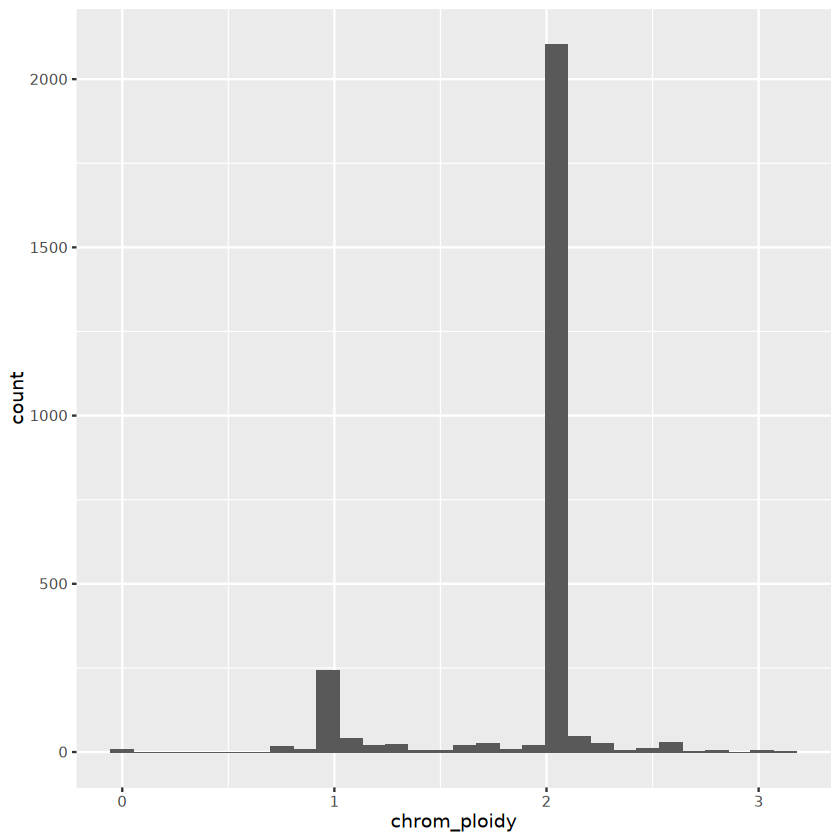

In [22]:
ggplot(cnv_chrom_summary_df, aes(x=chrom_ploidy)) + geom_histogram()

In [23]:
cnv_chrom_summary_df %>% filter(is_aneuploid)

cell_name,cell_type,chrom,chrom_diploid_dna,chrom_dna,chrom_ploidy,expected_chrom_ploidy,is_aneuploid
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<lgl>
SMACS1GFACQW,colon,Y,18624110,0,0,1,TRUE
SMACS5CAR9VS,colon,Y,18624110,0,0,1,TRUE
SMACS89AFNQ1,lung,Y,54106041,108212082,2,1,TRUE
SMACS8QNX6W9,lung,15,84981082,254943246,3,2,TRUE
SMACS8QNX6W9,lung,22,36364159,109092477,3,2,TRUE
SMACS9CX64QF,colon,11,134973053,134973053,1,2,TRUE
SMACS9CX64QF,colon,17,83177319,83177319,1,2,TRUE
SMACS9CX64QF,colon,8,145007332,145007332,1,2,TRUE
SMACSFUIX8H4,lung,18,80253159,80253159,1,2,TRUE


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


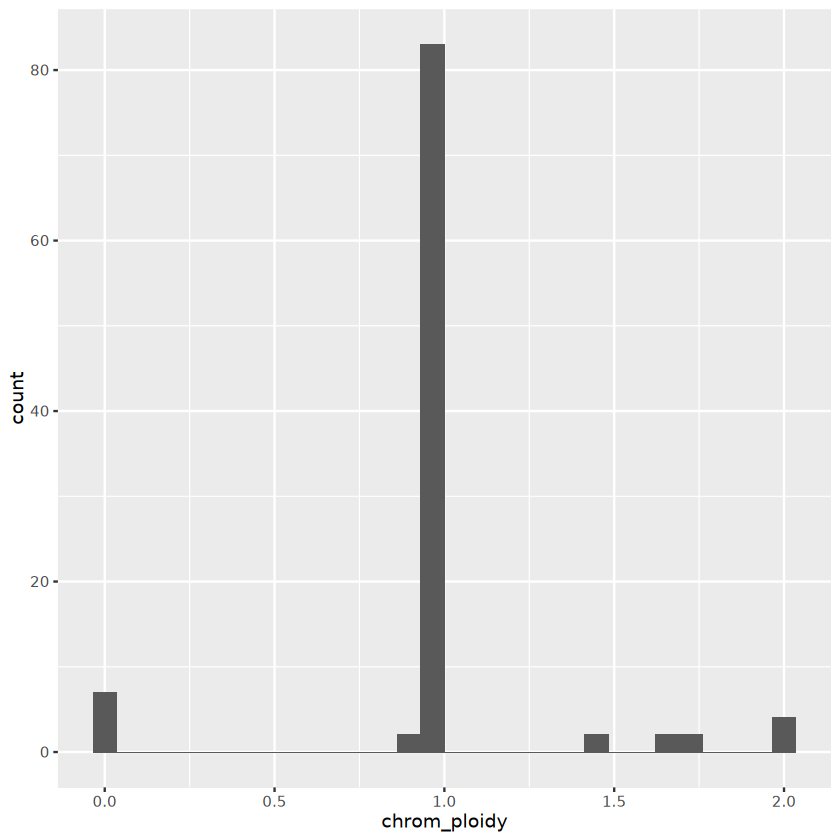

In [24]:
ggplot(cnv_chrom_summary_df %>% filter(chrom == "Y"), aes(x=chrom_ploidy)) + geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


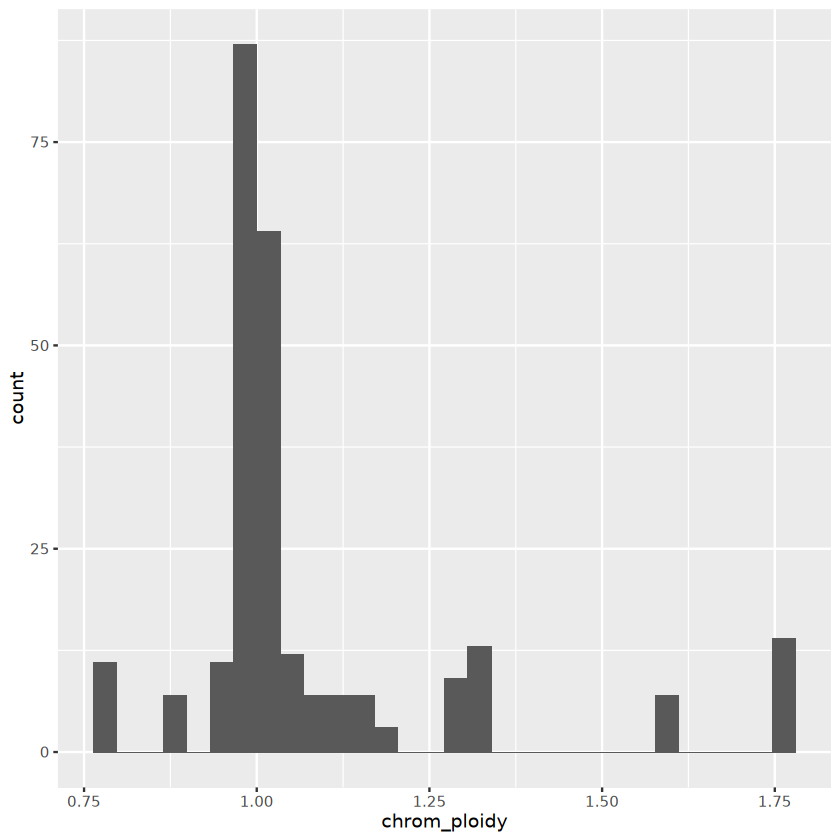

In [25]:
ggplot(cnv_chrom_summary_df %>% filter(chrom == "X"), aes(x=chrom_ploidy)) + geom_histogram()

In [26]:
unique(cnv_chrom_summary_df %>% filter(chrom == "X") %>% arrange(-1*chrom_ploidy))

cell_name,cell_type,chrom,chrom_diploid_dna,chrom_dna,chrom_ploidy,expected_chrom_ploidy,is_aneuploid
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<lgl>
SMACSGMFMORL,lung,X,156020336,277245703,1.776984,1,FALSE
SMACS237GKP7,lung,X,155489169,246204091,1.583416,1,FALSE
SMACSBM69H6Q,lung,X,155019392,205800961,1.327582,1,FALSE
SMACS7OGXC17,lung,X,155182169,200296151,1.290716,1,FALSE
SMACS89AFNQ1,lung,X,155454075,183393711,1.179729,1,FALSE
SMACS67U1B8D,colon,X,155492895,177411042,1.140959,1,FALSE
SMACSVVXLPOS,lung,X,153169508,172896708,1.128793,1,FALSE
SMACSG1A48WW,lung,X,156020346,173539729,1.112289,1,FALSE
SMACS8QNX6W9,lung,X,156020347,168021869,1.076923,1,FALSE


In [27]:
cnv_chrom_summary_df$chrom_id <- paste(cnv_chrom_summary_df$cell_name, cnv_chrom_summary_df$chrom)
seg_merged_data$chrom_id <- paste(seg_merged_data$cell_name, seg_merged_data$chrom)

In [28]:
seg_merged_data <- merge(seg_merged_data, cnv_chrom_summary_df %>% select(chrom_id, chrom_ploidy, is_aneuploid), all.x=TRUE)

In [29]:
head(seg_merged_data)

,chrom_id,start,end,CN,chrom,NBIN,RDR_SUM,RDR_MEAN,VAF_MEAN,VAF_ESTIMATE,⋯,CN_total,CN_A,CN_B,is_LOH,is_CNV,length,is_gain,is_loss,chrom_ploidy,is_aneuploid
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<int>,<lgl>,<lgl>,<dbl>,<lgl>
1,SMACS1CLQTQR 1,10033,248946312,1|1,1,420,585.7719,1.394695,1.2549245,NA,⋯,2,1,1,FALSE,FALSE,248936279,FALSE,FALSE,2,FALSE
2,SMACS1CLQTQR 10,10289,133787311,1|1,10,244,345.5439,1.416164,0.4215530,NA,⋯,2,1,1,FALSE,FALSE,133777022,FALSE,FALSE,2,FALSE
3,SMACS1CLQTQR 11,103470,135076523,1|1,11,246,397.6779,1.616577,1.3221556,NA,⋯,2,1,1,FALSE,FALSE,134973053,FALSE,FALSE,2,FALSE
4,SMACS1CLQTQR 12,10019,133264923,1|1,12,247,346.4506,1.402634,0.4262117,NA,⋯,2,1,1,FALSE,FALSE,133254904,FALSE,FALSE,2,FALSE
5,SMACS1CLQTQR 13,16000007,114354111,1|1,13,184,251.1853,1.365137,1.2745807,NA,⋯,2,1,1,FALSE,FALSE,98354104,FALSE,FALSE,2,FALSE
6,SMACS1CLQTQR 14,16023267,106883619,1|1,14,168,228.7876,1.361831,2.4366851,NA,⋯,2,1,1,FALSE,FALSE,90860352,FALSE,FALSE,2,FALSE


In [30]:
seg_merged_data %>% filter(chrom=="Y")

chrom_id,start,end,CN,chrom,NBIN,RDR_SUM,RDR_MEAN,VAF_MEAN,VAF_ESTIMATE,⋯,CN_total,CN_A,CN_B,is_LOH,is_CNV,length,is_gain,is_loss,chrom_ploidy,is_aneuploid
<chr>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<int>,<lgl>,<lgl>,<dbl>,<lgl>
SMACS1CLQTQR Y,2781484,21405594,1,Y,21,12.726733518,0.6060349294,NA,NA,⋯,1,1,0,FALSE,FALSE,18624110,FALSE,FALSE,1.0000000,FALSE
SMACS1GFACQW Y,2781484,21405594,0,Y,20,0.013354156,0.0006677078,NA,NA,⋯,0,0,0,FALSE,FALSE,18624110,FALSE,FALSE,0.0000000,TRUE
SMACS1OZ5RFS Y,2781484,56887525,1,Y,23,13.917769495,0.6051204128,NA,NA,⋯,1,1,0,FALSE,FALSE,54106041,FALSE,FALSE,1.0000000,FALSE
SMACS237GKP7 Y,2781484,18978069,1,Y,16,7.394332617,0.4621457886,NA,NA,⋯,1,1,0,FALSE,FALSE,16196585,FALSE,FALSE,1.0000000,FALSE
SMACS2CZN69C Y,2781484,21405594,1,Y,22,12.631716739,0.5741689427,NA,NA,⋯,1,1,0,FALSE,FALSE,18624110,FALSE,FALSE,1.0000000,FALSE
SMACS2T3VKE6 Y,2781484,56887525,1,Y,23,14.445561224,0.6280678793,NA,NA,⋯,1,1,0,FALSE,FALSE,54106041,FALSE,FALSE,1.0000000,FALSE
SMACS3LUUS3E Y,2781484,15243621,1,Y,14,8.035117699,0.5739369785,NA,NA,⋯,1,1,0,FALSE,FALSE,12462137,FALSE,FALSE,0.8713014,FALSE
SMACS3LUUS3E Y,2781484,15243621,1,Y,14,8.035117699,0.5739369785,NA,NA,⋯,1,1,0,FALSE,FALSE,12462137,FALSE,FALSE,0.8713014,FALSE
SMACS3LUUS3E Y,15243622,17084385,0,Y,3,0.901526507,0.3005088356,NA,NA,⋯,0,0,0,FALSE,FALSE,1840763,FALSE,FALSE,0.8713014,FALSE


In [31]:
qc_cells <- read_rds("cells_passing_25pct_20cnv.rds")

In [32]:
length(qc_cells)

[1] 98

In [33]:
cnv_summary_Y <- seg_merged_data %>%
filter(chrom %in% c("Y")) %>%
group_by(cell_name, cell_type) %>%
summarize(
    chrom_ploidy=chrom_ploidy[1],
    pass_QC=cell_name[1] %in% qc_cells,
    .groups = "drop"
  )

In [34]:
cnv_aneuploidy_Y <- cnv_summary_Y %>% filter(chrom_ploidy!=1) %>% arrange(chrom_ploidy)

In [35]:
cnv_aneuploidy_Y %>% filter(pass_QC)

cell_name,cell_type,chrom_ploidy,pass_QC
<chr>,<chr>,<dbl>,<lgl>
SMACS1GFACQW,colon,0.0000000,TRUE
SMACS5CAR9VS,colon,0.0000000,TRUE
SMACSG1OVSEO,lung,0.0000000,TRUE
SMACSPE8QXLN,lung,0.0000000,TRUE
SMACSSTHYMHB,colon,0.0000000,TRUE
SMACSTX2CBF7,colon,0.0000000,TRUE
SMACSXQPTC4P,colon,0.0000000,TRUE
SMACS3LUUS3E,lung,0.8713014,TRUE
SMACSDLFV1VU,lung,1.4147575,TRUE


In [36]:
dir.create(output_dir)

Warning message in dir.create(output_dir):
“'cnv_summary_plots' already exists”


In [37]:
write.table(cnv_aneuploidy_Y, file.path(output_dir, paste0("cnv_aneuploidy_Y",
                                                      "_cell-filter_", cell_set_to_use, 
                                                      "_length-filter_", if (is.null(length_filter)) "NULL" else as.character(length_filter), 
                                        ".tsv")), sep="\t", row.names=FALSE)


In [38]:
# only count non-aneuploid deletions, duplications, cn-loh
cnv_barchart_df <- seg_merged_data %>%
filter(chrom %in% c(1:22, "Y")) %>%
group_by(cell_name, cell_type) %>%
summarize(
    num_CNVs = sum(is_CNV | is_aneuploid, na.rm = TRUE),
    has_CNV = num_CNVs > 0,
    num_aneuploidies = sum(is_aneuploid, na.rm=TRUE),
    has_aneuploidy = num_aneuploidies > 0,
    num_DEL = sum(!is_aneuploid & is_loss, na.rm=TRUE),
    has_DEL = num_DEL > 0,
    num_DUP = sum(!is_aneuploid & is_gain, na.rm=TRUE),
    has_DUP = num_DUP > 0,
    num_CNLOH = sum(!is_aneuploid & chrom %in% c(1:22) &  CN_total==2 & CN != "1|1"),
    has_CNLOH = num_CNLOH > 0,
    pass_QC = cell_name[1] %in% qc_cells,
    .groups = "drop"
  )

In [39]:
head(cnv_barchart_df)

cell_name,cell_type,num_CNVs,has_CNV,num_aneuploidies,has_aneuploidy,num_DEL,has_DEL,num_DUP,has_DUP,num_CNLOH,has_CNLOH,pass_QC
<chr>,<chr>,<int>,<lgl>,<int>,<lgl>,<int>,<lgl>,<int>,<lgl>,<int>,<lgl>,<lgl>
SMACS1CLQTQR,lung,17,TRUE,0,FALSE,0,FALSE,17,TRUE,0,FALSE,TRUE
SMACS1GFACQW,colon,1,TRUE,1,TRUE,0,FALSE,0,FALSE,0,FALSE,TRUE
SMACS1OZ5RFS,colon,0,FALSE,0,FALSE,0,FALSE,0,FALSE,0,FALSE,TRUE
SMACS237GKP7,lung,3,TRUE,0,FALSE,3,TRUE,0,FALSE,0,FALSE,TRUE
SMACS2CZN69C,lung,0,FALSE,0,FALSE,0,FALSE,0,FALSE,0,FALSE,TRUE
SMACS2T3VKE6,colon,2,TRUE,0,FALSE,0,FALSE,0,FALSE,2,TRUE,TRUE


In [40]:
cnv_barchart_Y_df <- seg_merged_data %>%
filter(chrom %in% c("Y")) %>%
group_by(cell_name, cell_type) %>%
summarize(
    num_CNVs = sum(is_CNV, na.rm = TRUE),
    has_CNV = num_CNVs > 0,
    num_aneuploidies = sum(is_aneuploid, na.rm=TRUE),
    has_aneuploidy = num_aneuploidies > 0,
    num_DEL = sum(!is_aneuploid & is_loss, na.rm=TRUE),
    has_DEL = num_DEL > 0,
    num_DUP = sum(!is_aneuploid & is_gain, na.rm=TRUE),
    has_DUP = num_DUP > 0,
    num_CNLOH = sum(!is_aneuploid & chrom %in% c(1:22) &  CN_total==2 & CN != "1|1"),
    has_CNLOH = num_CNLOH > 0,
    pass_QC = cell_name[1] %in% qc_cells,
    .groups = "drop"
  )

In [41]:
cnv_barchart_Y_df %>% filter(pass_QC) %>% summarize(num_cells_with_CNV=sum(has_CNV),  num_cells_with_aneuploidy=sum(has_aneuploidy), num_cells_with_DEL=sum(has_DEL), num_cells_with_DUP=sum(has_DUP), num_cells_with_CNLOH=sum(has_CNLOH))

num_cells_with_CNV,num_cells_with_aneuploidy,num_cells_with_DEL,num_cells_with_DUP,num_cells_with_CNLOH
<int>,<int>,<int>,<int>,<int>
0,11,0,0,0


In [42]:
cnv_barchart_Y_df %>% filter(pass_QC) %>% group_by(cell_type) %>% summarize( num_cells_with_aneuploidy=sum(has_aneuploidy))

cell_type,num_cells_with_aneuploidy
<chr>,<int>
colon,6
lung,5


In [43]:
table(cnv_barchart_df$pass_QC)


TRUE 
  98 

In [44]:
cnv_barchart_df %>% filter(pass_QC) %>% summarize(num_cells_with_CNV=sum(has_CNV),  num_cells_with_aneuploidy=sum(has_aneuploidy), num_cells_with_DEL=sum(has_DEL), num_cells_with_DUP=sum(has_DUP), num_cells_with_CNLOH=sum(has_CNLOH))

num_cells_with_CNV,num_cells_with_aneuploidy,num_cells_with_DEL,num_cells_with_DUP,num_cells_with_CNLOH
<int>,<int>,<int>,<int>,<int>
31,14,11,15,3


In [45]:
cnv_barchart_df %>% filter(pass_QC) %>% filter(cell_type=="lung") %>% summarize(num_cells_with_CNV=sum(has_CNV),  num_cells_with_aneuploidy=sum(has_aneuploidy), num_cells_with_DEL=sum(has_DEL), num_cells_with_DUP=sum(has_DUP), num_cells_with_CNLOH=sum(has_CNLOH))

num_cells_with_CNV,num_cells_with_aneuploidy,num_cells_with_DEL,num_cells_with_DUP,num_cells_with_CNLOH
<int>,<int>,<int>,<int>,<int>
18,7,9,13,1


In [46]:
cnv_barchart_df %>% filter(pass_QC) %>% filter(cell_type=="colon") %>% summarize(num_cells_with_CNV=sum(has_CNV),  num_cells_with_aneuploidy=sum(has_aneuploidy), num_cells_with_DEL=sum(has_DEL), num_cells_with_DUP=sum(has_DUP), num_cells_with_CNLOH=sum(has_CNLOH))

num_cells_with_CNV,num_cells_with_aneuploidy,num_cells_with_DEL,num_cells_with_DUP,num_cells_with_CNLOH
<int>,<int>,<int>,<int>,<int>
13,7,2,2,2


In [47]:
cnv_barchart_df %>% filter(pass_QC) %>% filter(num_aneuploidies>1)

cell_name,cell_type,num_CNVs,has_CNV,num_aneuploidies,has_aneuploidy,num_DEL,has_DEL,num_DUP,has_DUP,num_CNLOH,has_CNLOH,pass_QC
<chr>,<chr>,<int>,<lgl>,<int>,<lgl>,<int>,<lgl>,<int>,<lgl>,<int>,<lgl>,<lgl>
SMACS8QNX6W9,lung,10,TRUE,2,TRUE,0,FALSE,8,TRUE,0,FALSE,TRUE
SMACS9CX64QF,colon,3,TRUE,3,TRUE,0,FALSE,0,FALSE,0,FALSE,TRUE
SMACSSTHYMHB,colon,2,TRUE,2,TRUE,0,FALSE,0,FALSE,0,FALSE,TRUE
SMACSTCRHHD9,colon,3,TRUE,3,TRUE,0,FALSE,0,FALSE,0,FALSE,TRUE
SMACSTLU27CI,lung,41,TRUE,2,TRUE,3,TRUE,36,TRUE,0,FALSE,TRUE
SMACSTX2CBF7,colon,3,TRUE,3,TRUE,0,FALSE,0,FALSE,0,FALSE,TRUE


In [48]:
library(tidyverse)

plot_df <- cnv_barchart_df %>%
  filter(pass_QC) %>%
  group_by(cell_type) %>%
  summarize(
    n_cells = n(),
    n_total = sum(has_CNV),
    n_aneuploidy = sum(has_aneuploidy),
    n_CNLOH = sum(has_CNLOH),
    n_DEL = sum(has_DEL),
    n_DUP = sum(has_DUP),
    .groups = "drop"
  ) %>%
  pivot_longer(
    cols = starts_with("n_"),
    names_to = "category",
    values_to = "count"
  ) %>%
  mutate(
    category = recode(category,                
      n_aneuploidy = "Aneuploidy",
      n_CNLOH = "CN-LOH",
      n_DEL = "Deletion",
      n_DUP = "Duplication",
      n_total = "Any CNV",
      n_cells = "All cells"
    ),
    # % of total cells (only meaningful for "Any CNV")
    percent_label = if_else(category == "Any CNV",
                            paste0(round(100 * count / count[category == "Total Cells"], 1), "%"),
                            NA_character_)
  ) %>%
  #filter(category != "Total Cells") %>%  # Drop n_total from plot
  mutate(
    category = factor(category, levels = c("All cells", "Any CNV", "Aneuploidy", "CN-LOH", "Deletion", "Duplication"))
  )


In [49]:
plot_df

cell_type,category,count,percent_label
<chr>,<fct>,<int>,<chr>
colon,All cells,45,NA
colon,Any CNV,13,%
colon,Aneuploidy,7,NA
colon,CN-LOH,2,NA
colon,Deletion,2,NA
colon,Duplication,2,NA
lung,All cells,53,NA
lung,Any CNV,18,%
lung,Aneuploidy,7,NA


In [50]:
plot_df$text_label <- NA
for (cell_type in unique(plot_df$cell_type)){
    num_cells_with_cnv <- plot_df$count[plot_df$category=="Any CNV" & plot_df$cell_type==cell_type]
    num_cells_total <- plot_df$count[plot_df$category=="All cells" & plot_df$cell_type==cell_type]
    plot_df$text_label[plot_df$category=="Any CNV" & plot_df$cell_type==cell_type] <- paste0(num_cells_with_cnv, " / ", num_cells_total)
    }
plot_df

cell_type,category,count,percent_label,text_label
<chr>,<fct>,<int>,<chr>,<chr>
colon,All cells,45,NA,NA
colon,Any CNV,13,%,13 / 45
colon,Aneuploidy,7,NA,NA
colon,CN-LOH,2,NA,NA
colon,Deletion,2,NA,NA
colon,Duplication,2,NA,NA
lung,All cells,53,NA,NA
lung,Any CNV,18,%,18 / 53
lung,Aneuploidy,7,NA,NA


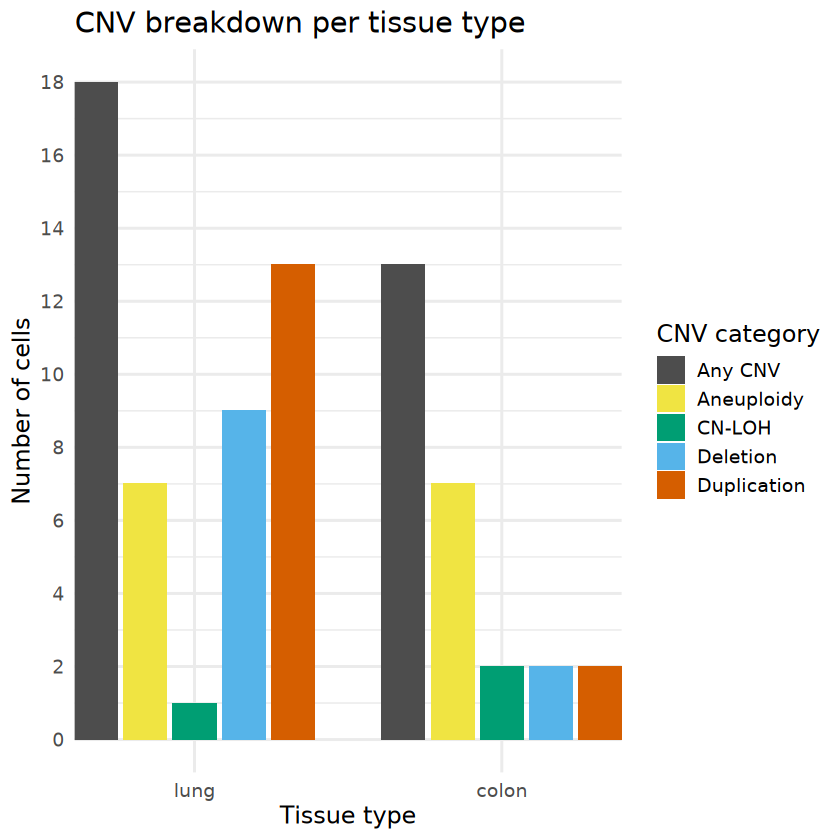

In [51]:
category_levels <- c("Any CNV", "Aneuploidy", "CN-LOH", "Deletion", "Duplication")
category_colors <- c(
  "Any CNV" = "#4D4D4D",  # neutral dark gray
  "Aneuploidy" = "#F0E442",  # yellow
  "CN-LOH"     = "#009E73",  # green
  "Deletion"   = "#56B4E9",  # blue
  "Duplication"= "#D55E00"  # red-orange
)
plot_df$cell_type <- factor(plot_df$cell_type,
                            levels = c("lung", "colon"))

p <- ggplot(plot_df %>% filter(category != "All cells"),
            aes(x = cell_type, y = count, fill = category)) +
  geom_bar(stat = "identity",
           position = position_dodge(width = 0.8),
           width = 0.7) +
  scale_fill_manual(values = category_colors) +
  scale_x_discrete(expand = expansion(mult = c(0.1, 0.3))) + # extra space to the right
  theme_minimal(base_size = 14) +
  labs(
    x = "Tissue type",
    y = "Number of cells",
    fill = "CNV category",
    title = "CNV breakdown per tissue type"
  ) +
  scale_y_continuous(breaks = seq(0, max(plot_df$count), 2))

print(p)



In [52]:
ggsave(file.path(output_dir, paste0("tissue_type_barplot", 
                                     "_cell-filter_", cell_set_to_use, 
                                    "_length-filter_", if (is.null(length_filter)) "NULL" else as.character(length_filter), 
                                        ".pdf")), p, device = cairo_pdf)



Saving 6.67 x 6.67 in image


Saving 6.67 x 6.67 in image


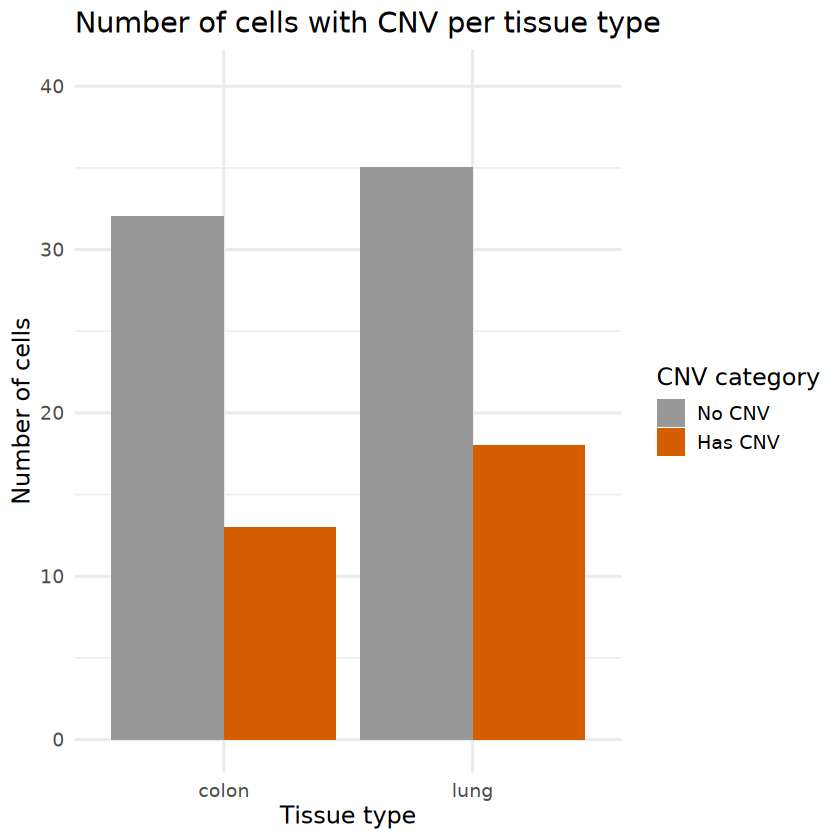

In [53]:
library(tidyverse)

plot_df2 <- cnv_barchart_df %>%
  group_by(cell_type) %>%
  summarize(
    n_total = n(),
    n_CNV = sum(has_CNV),
    n_flat = n_total - n_CNV,
    .groups = "drop"
  ) %>%
  pivot_longer(
    cols = starts_with("n_"),
    names_to = "category",
    values_to = "count"
  ) %>%
  mutate(
    category = recode(category,
      n_CNV = "Has CNV",
      n_flat = "No CNV",
      n_total = "Total Cells"
    )
  ) %>%
  filter(category != "Total Cells") %>%
  mutate(category = factor(category, levels = c("No CNV", "Has CNV")))

# Compute percentage label separately for accurate bar tops
percent_labels_df <- plot_df2 %>%
  filter(category == "Has CNV") %>%
  left_join(
    plot_df2 %>%
      filter(category %in% c("No CNV", "Has CNV")) %>%
      group_by(cell_type) %>%
      summarize(total = sum(count), .groups = "drop"),
    by = "cell_type"
  ) %>%
  mutate(
    percent_label = paste0(round(100 * count / total, 1), "%"),
    label_y = count + max(plot_df2$count) * 0.03  # a bit above the bar
  )

# Plot
p <- ggplot(plot_df2, aes(x = cell_type, y = count, fill = category)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal(base_size = 14) +
  labs(
    x = "Tissue type",
    y = "Number of cells",
    fill = "CNV category",
    title = "Number of cells with CNV per tissue type"
  ) +
  scale_fill_manual(values = c("No CNV" = "#999999", "Has CNV" = "#D55E00")) +
  ylim(0, max(plot_df2$count) * 1.15)  # Add space for the label

print(p)
ggsave(file.path(output_dir, paste0("tissue_with_cnv", 
                                    "_cell-filter_", cell_set_to_use, 
                                    "_length-filter_", if (is.null(length_filter)) "NULL" else as.character(length_filter), 
                                        ".pdf")), p, device = cairo_pdf)

In [54]:
head(cnv_barchart_df)

cell_name,cell_type,num_CNVs,has_CNV,num_aneuploidies,has_aneuploidy,num_DEL,has_DEL,num_DUP,has_DUP,num_CNLOH,has_CNLOH,pass_QC
<chr>,<chr>,<int>,<lgl>,<int>,<lgl>,<int>,<lgl>,<int>,<lgl>,<int>,<lgl>,<lgl>
SMACS1CLQTQR,lung,17,TRUE,0,FALSE,0,FALSE,17,TRUE,0,FALSE,TRUE
SMACS1GFACQW,colon,1,TRUE,1,TRUE,0,FALSE,0,FALSE,0,FALSE,TRUE
SMACS1OZ5RFS,colon,0,FALSE,0,FALSE,0,FALSE,0,FALSE,0,FALSE,TRUE
SMACS237GKP7,lung,3,TRUE,0,FALSE,3,TRUE,0,FALSE,0,FALSE,TRUE
SMACS2CZN69C,lung,0,FALSE,0,FALSE,0,FALSE,0,FALSE,0,FALSE,TRUE
SMACS2T3VKE6,colon,2,TRUE,0,FALSE,0,FALSE,0,FALSE,2,TRUE,TRUE


In [55]:
cells_with_cnv <- cnv_barchart_df %>% 
filter(has_CNV | has_aneuploidy | has_DEL | has_DUP | has_CNLOH) %>% 
select(cell_name, has_CNV, has_aneuploidy, has_DEL, has_DUP, has_CNLOH, pass_QC, cell_type)

In [56]:
head(cells_with_cnv)

cell_name,has_CNV,has_aneuploidy,has_DEL,has_DUP,has_CNLOH,pass_QC,cell_type
<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
SMACS1CLQTQR,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,lung
SMACS1GFACQW,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,colon
SMACS237GKP7,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,lung
SMACS2T3VKE6,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,colon
SMACS3LUUS3E,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,lung
SMACS5CAR9VS,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,colon


In [57]:
category_levels <- c("Aneuploidy", "CN-LOH", "Deletion", "Duplication")
category_colors <- c(
  "Aneuploidy" = "#F0E442",  # yellow
  "CN-LOH"     = "#009E73",  # green
  "Deletion"   = "#56B4E9",  # blue
  "Duplication"= "#D55E00"  # red-orange
)


In [58]:
seg_merged_data_orig <- read_rds("../notebooks_high-depth-CS_filter/seg_merged_df_NBIN-filtered_20.rds")
cell_data_orig <- read_rds("../notebooks_high-depth-CS_filter/cell_data_df_NBIN-filtered_20.rds")
cell_data_orig$CN_signal <- cell_data_orig$RDR*cell_data_orig$gamma
seg_merged_data_orig$CN_total <- NA

seg_merged_data_orig$CN <- as.character(seg_merged_data_orig$CN)

# Split CN into two numeric components
cn_split <- str_split(seg_merged_data_orig$CN, "\\|")

# Extract alleles as numeric values
seg_merged_data_orig$CN_A <- as.numeric(sapply(cn_split, `[`, 1))
seg_merged_data_orig$CN_B <- as.numeric(sapply(cn_split, `[`, 2))

# Compute total copy number
sex_chr_mask <- seg_merged_data_orig$chrom %in% c("X", "Y")
seg_merged_data_orig$CN_A[sex_chr_mask & is.na(seg_merged_data_orig$CN_A)] <- 0
seg_merged_data_orig$CN_B[sex_chr_mask & is.na(seg_merged_data_orig$CN_B)] <- 0

seg_merged_data_orig$CN_total <- seg_merged_data_orig$CN_A + seg_merged_data_orig$CN_B


In [59]:
cells_with_cnv <- cells_with_cnv %>% group_by(cell_name) %>% mutate(num_categories=sum(has_aneuploidy + has_DEL + has_DUP + has_CNLOH))
cells_with_cnv <- cells_with_cnv %>% filter(num_categories>0)
cells_with_cnv[cells_with_cnv$num_categories>1,]

cell_name,has_CNV,has_aneuploidy,has_DEL,has_DUP,has_CNLOH,pass_QC,cell_type,num_categories
<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<int>
SMACS7CK4YZS,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,lung,2
SMACS7OGXC17,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,lung,2
SMACS89AFNQ1,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,lung,2
SMACS8QNX6W9,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,lung,2
SMACSFUIX8H4,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,lung,2
SMACSG1OVSEO,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,lung,4
SMACSTLU27CI,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,lung,3
SMACSVVXLPOS,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,lung,3


In [60]:
all_cells_with_cnv <- cells_with_cnv[cells_with_cnv$num_categories>0,]
all_cells_with_cnv

cell_name,has_CNV,has_aneuploidy,has_DEL,has_DUP,has_CNLOH,pass_QC,cell_type,num_categories
<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<int>
SMACS1CLQTQR,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,lung,1
SMACS1GFACQW,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,colon,1
SMACS237GKP7,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,lung,1
SMACS2T3VKE6,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,colon,1
SMACS3LUUS3E,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,lung,1
SMACS5CAR9VS,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,colon,1
SMACS67U1B8D,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,colon,1
SMACS7CK4YZS,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,lung,2
SMACS7OGXC17,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,lung,2


In [61]:
write.table(all_cells_with_cnv,
            file.path(output_dir, paste0("all_cells_with_cnv", 
                                    "_cell-filter_", cell_set_to_use, 
                                    "_length-filter_", if (is.null(length_filter)) "NULL" else as.character(length_filter), 
                                        ".tsv")), sep="\t", row.names=FALSE)

In [62]:
source("../notebooks_filter/utils_high-depth.R")

In [63]:
#cell_name="SMHT002LungS2"
#cell_info <- cells_with_cnv[cells_with_cnv$cell_name == cell_name,]
#print(cell_info)
#cnv_presence <- tibble(
#    category = c("Aneuploidy", "CN-LOH", "Deletion", "Duplication"),
#    present = c(cell_info$has_aneuploidy, cell_info$has_CNLOH, cell_info$has_DEL, cell_info$has_DUP)
#    ) %>% filter(present)

#p <- plot_cell2_truncated(cell_name, cell_name, cell_data_orig, seg_merged_data_orig, cnv_presence = cnv_presence,
#              output_dir = "cell_plots", print_plot = FALSE, chrom_list = c(1:22, "X", "Y"))
#print(p)


In [64]:
dir.create(output_dir)

Warning message in dir.create(output_dir):
“'cnv_summary_plots' already exists”


In [65]:
dir.create("cell_plots_final")

Warning message in dir.create("cell_plots_final"):
“'cell_plots_final' already exists”


In [66]:
dim(cells_with_cnv)

[1] 31  9

In [67]:
table(cell_data_orig$cell_type)


 colon   lung 
243218 292878 

In [68]:
table(cells_with_cnv$cell_type)


colon  lung 
   13    18 

In [69]:
qc_cells

[1] "SMACS1CLQTQR" "SMACS1GFACQW" "SMACS1OZ5RFS" "SMACS237GKP7" "SMACS2CZN69C"
 [6] "SMACS2T3VKE6" "SMACS3LUUS3E" "SMACS3VLR8BN" "SMACS5CAR9VS" "SMACS61SL8NG"
[11] "SMACS65XVA6Y" "SMACS67U1B8D" "SMACS6BVVVQN" "SMACS6N94UKL" "SMACS6PTJONJ"
[16] "SMACS6WBMRYB" "SMACS6X5TALT" "SMACS7CK4YZS" "SMACS7OGXC17" "SMACS847FR52"
[21] "SMACS89AFNQ1" "SMACS8QNX6W9" "SMACS8VB15ZM" "SMACS8WX9HRR" "SMACS916XMLA"
[26] "SMACS9CX64QF" "SMACS9DI9AEO" "SMACS9H3Q4IB" "SMACS9H3UGVZ" "SMACS9V7SO8E"
[31] "SMACSADM3CGP" "SMACSAOGX8BS" "SMACSAQUIGKT" "SMACSBD3ZVMW" "SMACSBJ3VO7L"
[36] "SMACSBM69H6Q" "SMACSBR61KY4" "SMACSBYB858H" "SMACSCSZYUWQ" "SMACSCUG6A8O"
[41] "SMACSD4V6G43" "SMACSDEENE5R" "SMACSDJQBET7" "SMACSDLFV1VU" "SMACSDW7W9JM"
[46] "SMACSE8UHN33" "SMACSELLRHCZ" "SMACSF5MYSSK" "SMACSFUIX8H4" "SMACSFW8PPX5"
[51] "SMACSG1A48WW" "SMACSG1OVSEO" "SMACSG2YG7OW" "SMACSG9AAELV" "SMACSGMFMORL"
[56] "SMACSGP4CMDT" "SMACSH1WE7O7" "SMACSHIW5EMF" "SMACSHK8ZIGT" "SMACSIY9YVEC"
[61] "SMACSJ67WBP4" "SMACSKH513YN" "SMACSLBVO7UB" "SMACSLDLRC9G" "SMACSLF1SDA6"
[66] "SMACSM8QGSBA" "SMACSN3QDA78" "SMACSO4MTLQB" "SMACSOWHSDLN" "SMACSPE8QXLN"
[71] "SMACSPIS7WK8" "SMACSPJ4YK5Q" "SMACSPNEFIGY" "SMACSPQBK92L" "SMACSQ3AY64Y"
[76] "SMACSQ3F6FX4" "SMACSQCAZA5F" "SMACSQW3ECKL" "SMACSRGEXSYT" "SMACSSBO1MHW"
[81] "SMACSSCYDYVO" "SMACSSH8IU1K" "SMACSSM6NUU7" "SMACSSTHYMHB" "SMACST592TOV"
[86] "SMACSTCRHHD9" "SMACSTLU27CI" "SMACSTU79Z9B" "SMACSTX2CBF7" "SMACSVVXLPOS"
[91] "SMACSWN1GU3J" "SMACSWQEUWU3" "SMACSXQPTC4P" "SMACSXTNOZQA" "SMACSYBMLS5K"
[96] "SMACSYHXWV41" "SMACSZ2136VF" "SMACSZJOM8X7"

In [70]:
unique(cell_data_orig$cell_name)

[1] "SMACS1CLQTQR" "SMACS237GKP7" "SMACS2CZN69C" "SMACS3LUUS3E" "SMACS3WFHOU9"
  [6] "SMACS65XVA6Y" "SMACS6PTJONJ" "SMACS6X5TALT" "SMACS7CK4YZS" "SMACS7OGXC17"
 [11] "SMACS847FR52" "SMACS89AFNQ1" "SMACS8QNX6W9" "SMACS9H3Q4IB" "SMACS9H3UGVZ"
 [16] "SMACS9V7SO8E" "SMACSAOGX8BS" "SMACSBJ3VO7L" "SMACSBM69H6Q" "SMACSBYB858H"
 [21] "SMACSDEENE5R" "SMACSDLFV1VU" "SMACSFUIX8H4" "SMACSG1A48WW" "SMACSG1OVSEO"
 [26] "SMACSG2YG7OW" "SMACSGMFMORL" "SMACSGP4CMDT" "SMACSH1WE7O7" "SMACSIY9YVEC"
 [31] "SMACSLDLRC9G" "SMACSM8QGSBA" "SMACSN3QDA78" "SMACSOWHSDLN" "SMACSPE8QXLN"
 [36] "SMACSPIS7WK8" "SMACSPNEFIGY" "SMACSPQBK92L" "SMACSQ3F6FX4" "SMACSQCAZA5F"
 [41] "SMACSQW3ECKL" "SMACSRGEXSYT" "SMACSS68ZEYW" "SMACSSBO1MHW" "SMACSSH8IU1K"
 [46] "SMACSSM6NUU7" "SMACST592TOV" "SMACSTLU27CI" "SMACSTU79Z9B" "SMACSVVXLPOS"
 [51] "SMACSW7REYP9" "SMACSWN1GU3J" "SMACSYBMLS5K" "SMACSYHXWV41" "SMACSZ2136VF"
 [56] "SMACSZJOM8X7" "SMACS1GFACQW" "SMACS1OZ5RFS" "SMACS2T3VKE6" "SMACS3VLR8BN"
 [61] "SMACS5CAR9VS" "SMACS61SL8NG" "SMACS67U1B8D" "SMACS6BVVVQN" "SMACS6N94UKL"
 [66] "SMACS6WBMRYB" "SMACS8VB15ZM" "SMACS8WX9HRR" "SMACS916XMLA" "SMACS9CX64QF"
 [71] "SMACS9DI9AEO" "SMACSADM3CGP" "SMACSAQUIGKT" "SMACSBD3ZVMW" "SMACSBR61KY4"
 [76] "SMACSCSZYUWQ" "SMACSCUG6A8O" "SMACSD4V6G43" "SMACSDJQBET7" "SMACSDW7W9JM"
 [81] "SMACSE8UHN33" "SMACSELLRHCZ" "SMACSF5MYSSK" "SMACSFW8PPX5" "SMACSG9AAELV"
 [86] "SMACSHIW5EMF" "SMACSHK8ZIGT" "SMACSIGNW5HE" "SMACSJ67WBP4" "SMACSKH513YN"
 [91] "SMACSLBVO7UB" "SMACSLF1SDA6" "SMACSO4MTLQB" "SMACSPJ4YK5Q" "SMACSQ3AY64Y"
 [96] "SMACSSCYDYVO" "SMACSSTHYMHB" "SMACSTCRHHD9" "SMACSTX2CBF7" "SMACSWQEUWU3"
[101] "SMACSXQPTC4P" "SMACSXTNOZQA"

In [71]:
setdiff(unique(cell_data_orig$cell_name), qc_cells)

[1] "SMACS3WFHOU9" "SMACSS68ZEYW" "SMACSW7REYP9" "SMACSIGNW5HE"

library(patchwork)
library(Cairo)
dir.create("qc_fail_cells")
for (cell_name in setdiff(unique(cell_data_orig$cell_name), qc_cells)){
    p <- plot_cell2_supplementary(
        cell_name,
        NULL,
        cell_data_orig,
        seg_merged_data_orig,
        cnv_presence = NULL,
        output_dir = "qc_fail_cells",
        print_plot = TRUE,
        chrom_list = c(1:22, "X", "Y")
      )
      
}

In [72]:
colnames(cell_data_orig)

[1] "CHROM"        "START"        "END"          "A"            "B"           
 [6] "N"            "TOTAL"        "pBAF"         "BAF"          "MAJOR"       
[11] "MINOR"        "RDR"          "OBS"          "EXP"          "VAF_MEAN"    
[16] "RDR_MEAN"     "VAF_ESTIMATE" "CN"           "pval"         "prob"        
[21] "CN_A"         "CN_B"         "CN_total"     "gamma"        "sample"      
[26] "cell_name"    "batch_name"   "cell_type"    "CN_signal"

In [73]:
sample_id_metadata_df <- read.csv("refs/all_sample_id_mappings.csv")

In [74]:
head(sample_id_metadata_df)

,center,tissue,alias,submitted_id,up_id_bam,up_id_header,special_id1,special_id2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,yale-bcm,lung,Lu_1,ST002-YALE-LUNG-1,SMAFIGL3ODC4,SMACSSH8IU1K,CollabPTA_Yale_Lung_1,IDUDI0085
2,yale-bcm,lung,Lu_2,ST002-YALE-LUNG-2,SMAFIL87OPFP,SMACS65XVA6Y,CollabPTA_Yale_Lung_2,IDUDI0086
3,yale-bcm,lung,Lu_3,ST002-YALE-LUNG-3,SMAFI68KX6AU,SMACSZ2136VF,CollabPTA_Yale_Lung_3,IDUDI0087
4,yale-bcm,lung,Lu_4,ST002-YALE-LUNG-4,SMAFI1HFQVKJ,SMACS9V7SO8E,CollabPTA_Yale_Lung_4,IDUDI0088
5,yale-bcm,lung,Lu_5,ST002-YALE-LUNG-5,SMAFIOJS918Q,SMACSOWHSDLN,CollabPTA_Yale_Lung_5,IDUDI0089
6,yale-bcm,lung,Lu_6,ST002-YALE-LUNG-6,SMAFIN8PYW1B,SMACSTU79Z9B,CollabPTA_Yale_Lung_6,IDUDI0090


In [75]:
site_name_df=data.frame(center=c("yale-bcm", "mayo-washu", "bch-broad", "g1", "nygc"),
                        center_name=c("Yale-BCM", "Mayo-WashU", "BCH-Broad", "Yonsei", "NYGC"))

In [76]:
head(site_name_df)

,center,center_name
,<chr>,<chr>
1,yale-bcm,Yale-BCM
2,mayo-washu,Mayo-WashU
3,bch-broad,BCH-Broad
4,g1,Yonsei
5,nygc,NYGC


In [77]:
sample_id_metadata_df <- merge(sample_id_metadata_df, site_name_df, by="center")

In [78]:
sample_id_metadata_df <- sample_id_metadata_df %>% mutate(sample_name=paste(center_name, alias, sep=", "))

In [79]:
unique(sample_id_metadata_df$sample_name)

[1] "BCH-Broad, Co_1"     "BCH-Broad, Co_2"     "BCH-Broad, Co_3"    
  [4] "BCH-Broad, Co_4"     "BCH-Broad, Co_5"     "BCH-Broad, Co_6"    
  [7] "BCH-Broad, Co_7"     "BCH-Broad, Co_8"     "BCH-Broad, Co_9"    
 [10] "BCH-Broad, Co_10"    "BCH-Broad, Lu_1"     "BCH-Broad, Lu_2"    
 [13] "BCH-Broad, Lu_3"     "BCH-Broad, Lu_4"     "BCH-Broad, Lu_5"    
 [16] "BCH-Broad, Lu_6"     "BCH-Broad, Lu_7"     "BCH-Broad, Lu_8"    
 [19] "BCH-Broad, Lu_9"     "BCH-Broad, Lu_10"    "Yonsei, Lu-12"      
 [22] "Yonsei, Lu-11"       "Yonsei, Lu-10"       "Yonsei, Lu-9"       
 [25] "Yonsei, Lu-7"        "Yonsei, Lu-6"        "Yonsei, Lu-4"       
 [28] "Yonsei, Lu-1"        "Mayo-WashU, Co_MG9"  "Mayo-WashU, Co_MG48"
 [31] "Mayo-WashU, Co_MG46" "Mayo-WashU, Co_MG37" "Mayo-WashU, Co_MG14"
 [34] "Mayo-WashU, Co_MG11" "Mayo-WashU, Co_80"   "Mayo-WashU, Co_74"  
 [37] "Mayo-WashU, Co_72"   "Mayo-WashU, Co_70"   "Mayo-WashU, Co_66"  
 [40] "Mayo-WashU, Co_49"   "Mayo-WashU, Co_48"   "Mayo-WashU, Co_14"  
 [43] "Mayo-WashU, Lu_n9"   "Mayo-WashU, Lu_n6"   "Mayo-WashU, Lu_n4"  
 [46] "Mayo-WashU, Lu_n20"  "Mayo-WashU, Lu_n2"   "Mayo-WashU, Lu_n19" 
 [49] "Mayo-WashU, Lu_n16"  "Mayo-WashU, Lu_n15"  "Mayo-WashU, Lu_n14" 
 [52] "Mayo-WashU, Lu_n11"  "Mayo-WashU, Lu_S6"   "Mayo-WashU, Lu_S3"  
 [55] "Mayo-WashU, Lu_S2"   "Mayo-WashU, Lu_S13"  "Mayo-WashU, Lu_S12" 
 [58] "Mayo-WashU, Lu_S10"  "Mayo-WashU, Lu_8"    "Mayo-WashU, Lu_32"  
 [61] "Mayo-WashU, Lu_27"   "Mayo-WashU, Lu_25"   "Mayo-WashU, Lu_24"  
 [64] "Mayo-WashU, Lu_23"   "Mayo-WashU, Lu_22"   "Mayo-WashU, Lu_20"  
 [67] "Mayo-WashU, Lu_19"   "Mayo-WashU, Lu_14"   "NYGC, Co_4"         
 [70] "NYGC, Co_3"          "NYGC, Co_2"          "NYGC, Co_1"         
 [73] "NYGC, Lu_4"          "NYGC, Lu_3"          "NYGC, Lu_1"         
 [76] "Yale-BCM, Lu_1"      "Yale-BCM, Lu_2"      "Yale-BCM, Lu_3"     
 [79] "Yale-BCM, Lu_4"      "Yale-BCM, Lu_5"      "Yale-BCM, Lu_6"     
 [82] "Yale-BCM, Lu_7"      "Yale-BCM, Lu_8"      "Yale-BCM, Lu_9"     
 [85] "Yale-BCM, Co_1"      "Yale-BCM, Co_10"     "Yale-BCM, Co_11"    
 [88] "Yale-BCM, Co_12"     "Yale-BCM, Co_13"     "Yale-BCM, Co_14"    
 [91] "Yale-BCM, Co_15"     "Yale-BCM, Co_16"     "Yale-BCM, Co_17"    
 [94] "Yale-BCM, Co_18"     "Yale-BCM, Co_2"      "Yale-BCM, Co_3"     
 [97] "Yale-BCM, Co_4"      "Yale-BCM, Co_5"      "Yale-BCM, Co_6"     
[100] "Yale-BCM, Co_7"      "Yale-BCM, Co_8"      "Yale-BCM, Co_9"

In [80]:
qc_fail_cells <- setdiff(unique(cell_data_orig$cell_name), qc_cells)

In [81]:
head(qc_fail_cells)

[1] "SMACS3WFHOU9" "SMACSS68ZEYW" "SMACSW7REYP9" "SMACSIGNW5HE"

In [82]:
cells_with_cnv <- cells_with_cnv %>% filter(!cell_name %in% qc_fail_cells)

In [83]:
cells_with_cnv

cell_name,has_CNV,has_aneuploidy,has_DEL,has_DUP,has_CNLOH,pass_QC,cell_type,num_categories
<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<int>
SMACS1CLQTQR,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,lung,1
SMACS1GFACQW,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,colon,1
SMACS237GKP7,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,lung,1
SMACS2T3VKE6,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,colon,1
SMACS3LUUS3E,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,lung,1
SMACS5CAR9VS,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,colon,1
SMACS67U1B8D,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,colon,1
SMACS7CK4YZS,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,lung,2
SMACS7OGXC17,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,lung,2


In [84]:
source("../notebooks_filter/utils_high-depth.R")

library(patchwork)
library(Cairo)
library(cowplot)

for (cell_type_curr in unique(cell_data_orig$cell_type)){
    # Collect all your plots in a list
    baf_plots <- list()
    rdr_plots <- list()
    ordered_cells <- cells_with_cnv %>%
      filter(cell_type==cell_type_curr) %>%
      pull(cell_name)
    message(length(ordered_cells))

    
    for (cell_name in ordered_cells) {
      cell_info <- cells_with_cnv[cells_with_cnv$cell_name == cell_name,]
      plot_title <- sample_id_metadata_df %>% filter(up_id_header==cell_name) %>% pull(sample_name)
      
      cnv_presence <- tibble(
        category = c("Aneuploidy", "CN-LOH", "Deletion", "Duplication", "Failed QC"),
        present = c(cell_info$pass_QC & cell_info$has_aneuploidy, cell_info$pass_QC & cell_info$has_CNLOH, cell_info$pass_QC & cell_info$has_DEL, cell_info$pass_QC & cell_info$has_DUP, !cell_info$pass_QC)
      ) %>% filter(present)
      
      plot_list <- plot_cell2_supplementary2(
        cell_name,
        plot_title,
        cell_data_orig,
        seg_merged_data_orig,
        cnv_presence = cnv_presence,
        output_dir = NULL, #"cell_plots_final",
        print_plot = FALSE,
        chrom_list = c(1:22, "X", "Y")
      )
      
      rdr_plots[[cell_name]] <- plot_list$rdr
      baf_plots[[cell_name]] <- plot_list$baf
    }
    


    # Create paired columns (RDR above BAF for each cell)
    paired_columns <- list()
    for(i in seq_along(rdr_plots)) {
      # Keep y-axis titles only for the first column in each row (1st, 4th, 7th, etc.)
      if(i %% 3 != 1) {
        rdr_plots[[i]] <- rdr_plots[[i]] + 
          theme(axis.title.y = element_blank())
        baf_plots[[i]] <- baf_plots[[i]] + 
          theme(axis.title.y = element_blank())
      }
      
      # Stack RDR above BAF for this cell
      paired_columns[[i]] <- rdr_plots[[i]] / baf_plots[[i]]
    }
    
    # Arrange all paired columns horizontally
    final_grid <- wrap_plots(paired_columns, ncol = 3)
    
    # Create legend for the CNV categories
    category_colors <- c(
        "Aneuploidy" = "#F0E442",  # yellow
        "CN-LOH"     = "#009E73",  # green
        "Deletion"   = "#56B4E9",  # blue
        "Duplication"= "#D55E00"   # red-orange
    )
    
    # Create a simple legend plot
    legend_data <- data.frame(
      category = factor(names(category_colors), levels = names(category_colors)),
      x = 1:4,
      y = rep(1, 4)
    )
    
    legend_plot <- ggplot(legend_data, aes(x = x, y = y, fill = category)) +
      geom_point(alpha = 0) +  # Invisible points just to create the legend
      scale_fill_manual(values = category_colors, name = "CNV Type") +
      theme_void() +
      theme(
        legend.position = "bottom",
        legend.title = element_text(size = 12, face = "bold"),
        legend.text = element_text(size = 10),
        legend.key = element_rect(color = "black", size = 0.5),
        legend.key.size = unit(0.6, "cm"),
        legend.margin = margin(t = 10),
        plot.margin = unit(c(0,0,0,0), "cm")
      ) +
      guides(fill = guide_legend(
        nrow = 1,
        keywidth = unit(0.8, "cm"),
        keyheight = unit(0.6, "cm"),
        override.aes = list(shape = 22, size = 3, alpha = 1, color = "black")
      ))
    
    # Add legend at the bottom using patchwork
    final_grid <- final_grid / legend_plot + plot_layout(heights = c(10, 1))

    # Create panel label (A, B, C, etc.) - you'll need to track this outside the loop
    panel_label <- LETTERS[which(unique(cell_data_orig$cell_type) == cell_type_curr)]
    
    # Add title and panel label to the complete final grid
    final_grid <- final_grid + 
      plot_annotation(
        title = paste0(panel_label, ". ", tools::toTitleCase(cell_type_curr), " cells with CNV"),
        theme = theme(
          plot.title = element_text(size = 16, face = "bold", hjust = 0)
        )
      )
        
    
    # Save to PDF 
    CairoPDF(file.path(output_dir, paste0(cell_type_curr, "_cells_grid", 
                                        "_cell-filter_", cell_set_to_use, 
                                        "_length-filter_", if (is.null(length_filter)) "NULL" else as.character(length_filter), 
                                            ".pdf")), width = 8.5, height = 11)
    print(final_grid)  # Fixed: was 'grid_plot' but should be 'final_grid'
    dev.off()
}

In [85]:
qc_fail_cells

[1] "SMACS3WFHOU9" "SMACSS68ZEYW" "SMACSW7REYP9" "SMACSIGNW5HE"

In [86]:
head(seg_merged_data_orig)

start,end,CN,chrom,NBIN,RDR_SUM,RDR_MEAN,VAF_MEAN,VAF_ESTIMATE,sample,cell_name,batch_name,cell_type,CN_total,CN_A,CN_B
<int>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
10033,248946312,1|1,1,420,585.7719,1.394695,1.2549245,NA,ST002,SMACS1CLQTQR,batch-6-uniform_lung,lung,2,1,1
10289,133787311,1|1,10,244,345.5439,1.416164,0.4215530,NA,ST002,SMACS1CLQTQR,batch-6-uniform_lung,lung,2,1,1
103470,135076523,1|1,11,246,397.6779,1.616577,1.3221556,NA,ST002,SMACS1CLQTQR,batch-6-uniform_lung,lung,2,1,1
10019,133264923,1|1,12,247,346.4506,1.402634,0.4262117,NA,ST002,SMACS1CLQTQR,batch-6-uniform_lung,lung,2,1,1
16000007,114354111,1|1,13,184,251.1853,1.365137,1.2745807,NA,ST002,SMACS1CLQTQR,batch-6-uniform_lung,lung,2,1,1
16023267,106883619,1|1,14,168,228.7876,1.361831,2.4366851,NA,ST002,SMACS1CLQTQR,batch-6-uniform_lung,lung,2,1,1


In [87]:
source("../notebooks_filter/utils_high-depth.R")

In [88]:
head(cells_with_cnv)

cell_name,has_CNV,has_aneuploidy,has_DEL,has_DUP,has_CNLOH,pass_QC,cell_type,num_categories
<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<int>
SMACS1CLQTQR,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,lung,1
SMACS1GFACQW,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,colon,1
SMACS237GKP7,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,lung,1
SMACS2T3VKE6,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,colon,1
SMACS3LUUS3E,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,lung,1
SMACS5CAR9VS,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,colon,1


In [89]:
milovan_qc_fail_cells <- c("SMAFIDHFGEO7", "SMAFI7TOOAK6", "SMAFIVPONF1W", "SMAFIZ8WLLK3")

In [90]:
milovan_qc_fail_cell_df <- data.frame(up_id_bam=milovan_qc_fail_cells)

In [91]:
milovan_qc_fail_cell_df <- merge(sample_id_metadata_df, milovan_qc_fail_cell_df, by="up_id_bam")

In [92]:
milovan_qc_fail_cell_df

up_id_bam,center,tissue,alias,submitted_id,up_id_header,special_id1,special_id2,center_name,sample_name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
SMAFI7TOOAK6,mayo-washu,lung,Lu_14,SMHT002Lung14,SMACSW7REYP9,SMHT002Lung14,,Mayo-WashU,"Mayo-WashU, Lu_14"
SMAFIDHFGEO7,g1,lung,Lu-12,SM002-Lu-12-873,SMACSS68ZEYW,SM002-Lu-12-873,,Yonsei,"Yonsei, Lu-12"
SMAFIVPONF1W,mayo-washu,lung,Lu_n4,SMHT002Lungnuclei4,SMACSG1OVSEO,SMHT002Lungnuclei4,,Mayo-WashU,"Mayo-WashU, Lu_n4"
SMAFIZ8WLLK3,bch-broad,colon,Co_9,ST002-1G-040-PTA-BC8,SMACSIGNW5HE,SM-OGQSQ,Co_OGQSQ,BCH-Broad,"BCH-Broad, Co_9"


In [93]:
milovan_qc_fail_cell_names <- milovan_qc_fail_cell_df %>% pull(up_id_header)

In [94]:
milovan_qc_fail_cell_names

[1] "SMACSW7REYP9" "SMACSS68ZEYW" "SMACSG1OVSEO" "SMACSIGNW5HE"

In [95]:
qc_fail_cells

[1] "SMACS3WFHOU9" "SMACSS68ZEYW" "SMACSW7REYP9" "SMACSIGNW5HE"

In [96]:
source("../notebooks_filter/utils_high-depth.R")

In [97]:
names(cell_data)

[1] "CHROM"        "START"        "END"          "A"            "B"           
 [6] "N"            "TOTAL"        "pBAF"         "BAF"          "MAJOR"       
[11] "MINOR"        "RDR"          "OBS"          "EXP"          "VAF_MEAN"    
[16] "RDR_MEAN"     "VAF_ESTIMATE" "CN"           "pval"         "prob"        
[21] "CN_A"         "CN_B"         "CN_total"     "gamma"        "sample"      
[26] "cell_name"    "batch_name"   "cell_type"

In [98]:
unique(cell_data %>% filter(cell_name=="SMACS3WFHOU9", CHROM==1) %>% pull(gamma))

[1] 0.7124976

In [99]:
cell_data_scan2 <- read.csv("refs/four_cells_suppfig10_100kb_bins.csv")

In [100]:
head(cell_data_scan2)

,chr,start,end,count,GC,ratio,ratio.gcnorm,seg.id,ratio.gcnorm.segmented,garvin.seg,garvin.seg.integer,garvin.ratio.gcnorm.ploidy,sample
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
1,chr1,0,894038,4820,0.4361710,0.5004671,0.5115067,1,0.9280021,0.9276927,3,1.585671,SMACSW7REYP9
2,chr1,894038,995397,2597,0.6089475,0.2696979,0.7964854,1,0.9280021,0.9276927,3,2.469105,SMACSW7REYP9
3,chr1,995397,1097556,1821,0.6345192,0.1891415,0.7193048,1,0.9280021,0.9276927,3,2.229845,SMACSW7REYP9
4,chr1,1097556,1199116,1625,0.5842305,0.1687948,0.3921599,1,0.9280021,0.9276927,3,1.215696,SMACSW7REYP9
5,chr1,1199116,1301179,1174,0.6254329,0.1219765,0.4239225,1,0.9280021,0.9276927,3,1.314160,SMACSW7REYP9
6,chr1,1301179,1402523,2011,0.6035128,0.2088654,0.5848681,1,0.9280021,0.9276927,3,1.813091,SMACSW7REYP9


In [101]:
head(cell_data)

,CHROM,START,END,A,B,N,TOTAL,pBAF,BAF,MAJOR,⋯,pval,prob,CN_A,CN_B,CN_total,gamma,sample,cell_name,batch_name,cell_type
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,1,10033,1365962,407,303,52,710,0.4267606,0.4267606,407,⋯,0,1,1,1,2,1.448953,ST002,SMACS1CLQTQR,batch-6-uniform_lung,lung
2,1,1365963,1975218,1118,1084,139,2202,0.4922797,0.4922797,1118,⋯,0,1,1,1,2,1.448953,ST002,SMACS1CLQTQR,batch-6-uniform_lung,lung
3,1,1975219,2485674,1174,1553,229,2727,0.5694903,0.4305097,1553,⋯,0,1,1,1,2,1.448953,ST002,SMACS1CLQTQR,batch-6-uniform_lung,lung
4,1,2485675,3115514,1197,755,145,1952,0.3867828,0.3867828,1197,⋯,0,1,1,1,2,1.448953,ST002,SMACS1CLQTQR,batch-6-uniform_lung,lung
5,1,3115515,3623265,5210,2425,259,7635,0.3176162,0.3176162,5210,⋯,0,1,1,1,2,1.448953,ST002,SMACS1CLQTQR,batch-6-uniform_lung,lung
6,1,3623266,4135875,7073,9952,577,17025,0.5845521,0.4154479,9952,⋯,0,1,1,1,2,1.448953,ST002,SMACS1CLQTQR,batch-6-uniform_lung,lung


In [102]:
cell_data_scan2$CHROM <- gsub("chr", "", cell_data_scan2$chr)
cell_data_scan2$START <- cell_data_scan2$start
cell_data_scan2$END <- cell_data_scan2$end
cell_data_scan2$CN_signal <- cell_data_scan2$count
cell_data_scan2$cell_name <- cell_data_scan2$sample

In [103]:
unique(cell_data_scan2$CHROM)

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "X"  "Y"

In [104]:
head(cell_data_scan2)

,chr,start,end,count,GC,ratio,ratio.gcnorm,seg.id,ratio.gcnorm.segmented,garvin.seg,garvin.seg.integer,garvin.ratio.gcnorm.ploidy,sample,CHROM,START,END,CN_signal,cell_name
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<chr>
1,chr1,0,894038,4820,0.4361710,0.5004671,0.5115067,1,0.9280021,0.9276927,3,1.585671,SMACSW7REYP9,1,0,894038,4820,SMACSW7REYP9
2,chr1,894038,995397,2597,0.6089475,0.2696979,0.7964854,1,0.9280021,0.9276927,3,2.469105,SMACSW7REYP9,1,894038,995397,2597,SMACSW7REYP9
3,chr1,995397,1097556,1821,0.6345192,0.1891415,0.7193048,1,0.9280021,0.9276927,3,2.229845,SMACSW7REYP9,1,995397,1097556,1821,SMACSW7REYP9
4,chr1,1097556,1199116,1625,0.5842305,0.1687948,0.3921599,1,0.9280021,0.9276927,3,1.215696,SMACSW7REYP9,1,1097556,1199116,1625,SMACSW7REYP9
5,chr1,1199116,1301179,1174,0.6254329,0.1219765,0.4239225,1,0.9280021,0.9276927,3,1.314160,SMACSW7REYP9,1,1199116,1301179,1174,SMACSW7REYP9
6,chr1,1301179,1402523,2011,0.6035128,0.2088654,0.5848681,1,0.9280021,0.9276927,3,1.813091,SMACSW7REYP9,1,1301179,1402523,2011,SMACSW7REYP9


In [105]:
source("../notebooks_filter/utils_high-depth.R")


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


The following object is masked from ‘package:lubridate’:

    stamp




   CHROM actual_n_bins force_n_bins n_bins offset
1      1          2149           NA   2149      0
2      2          2294           NA   2294   2149
3      3          1914           NA   1914   4443
4      4          1819           NA   1819   6357
5      5          1707           NA   1707   8176
6      6          1592           NA   1592   9883
7      7          1475           NA   1475  11475
8      8          1357           NA   1357  12950
9      9          1081           NA   1081  14307
10    10          1269           NA   1269  15388
11    11          1268           NA   1268  16657
12    12          1272           NA   1272  17925
13    13           940           NA    940  19197
14    14           831           NA    831  20137
15    15           720           NA    720  20968
16    16           713           NA    713  21688
17    17           702           NA    702  22401
18    18           724           NA    724  23103
19    19           524           NA    524  23827


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


   CHROM actual_n_bins force_n_bins n_bins offset
1      1          2149           NA   2149      0
2      2          2294           NA   2294   2149
3      3          1914           NA   1914   4443
4      4          1819           NA   1819   6357
5      5          1707           NA   1707   8176
6      6          1592           NA   1592   9883
7      7          1475           NA   1475  11475
8      8          1357           NA   1357  12950
9      9          1081           NA   1081  14307
10    10          1269           NA   1269  15388
11    11          1268           NA   1268  16657
12    12          1272           NA   1272  17925
13    13           940           NA    940  19197
14    14           831           NA    831  20137
15    15           720           NA    720  20968
16    16           713           NA    713  21688
17    17           702           NA    702  22401
18    18           724           NA    724  23103
19    19           524           NA    524  23827


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


   CHROM actual_n_bins force_n_bins n_bins offset
1      1          2149           NA   2149      0
2      2          2294           NA   2294   2149
3      3          1914           NA   1914   4443
4      4          1819           NA   1819   6357
5      5          1707           NA   1707   8176
6      6          1592           NA   1592   9883
7      7          1475           NA   1475  11475
8      8          1357           NA   1357  12950
9      9          1081           NA   1081  14307
10    10          1269           NA   1269  15388
11    11          1268           NA   1268  16657
12    12          1272           NA   1272  17925
13    13           940           NA    940  19197
14    14           831           NA    831  20137
15    15           720           NA    720  20968
16    16           713           NA    713  21688
17    17           702           NA    702  22401
18    18           724           NA    724  23103
19    19           524           NA    524  23827


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


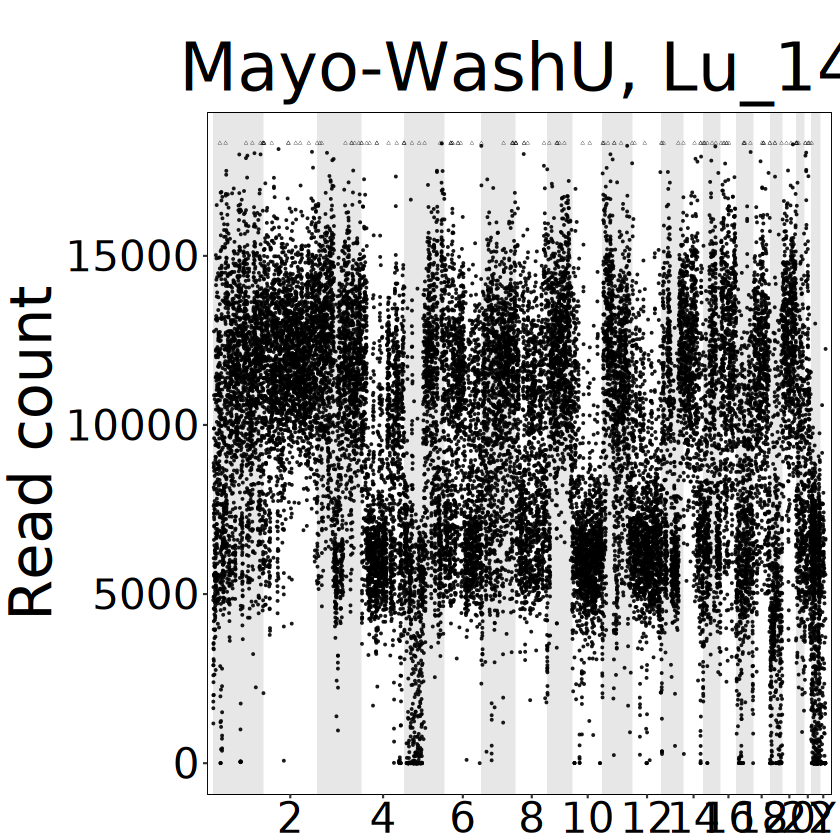

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


   CHROM actual_n_bins force_n_bins n_bins offset
1      1          2149           NA   2149      0
2      2          2294           NA   2294   2149
3      3          1914           NA   1914   4443
4      4          1819           NA   1819   6357
5      5          1707           NA   1707   8176
6      6          1592           NA   1592   9883
7      7          1475           NA   1475  11475
8      8          1357           NA   1357  12950
9      9          1081           NA   1081  14307
10    10          1269           NA   1269  15388
11    11          1268           NA   1268  16657
12    12          1272           NA   1272  17925
13    13           940           NA    940  19197
14    14           831           NA    831  20137
15    15           720           NA    720  20968
16    16           713           NA    713  21688
17    17           702           NA    702  22401
18    18           724           NA    724  23103
19    19           524           NA    524  23827


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


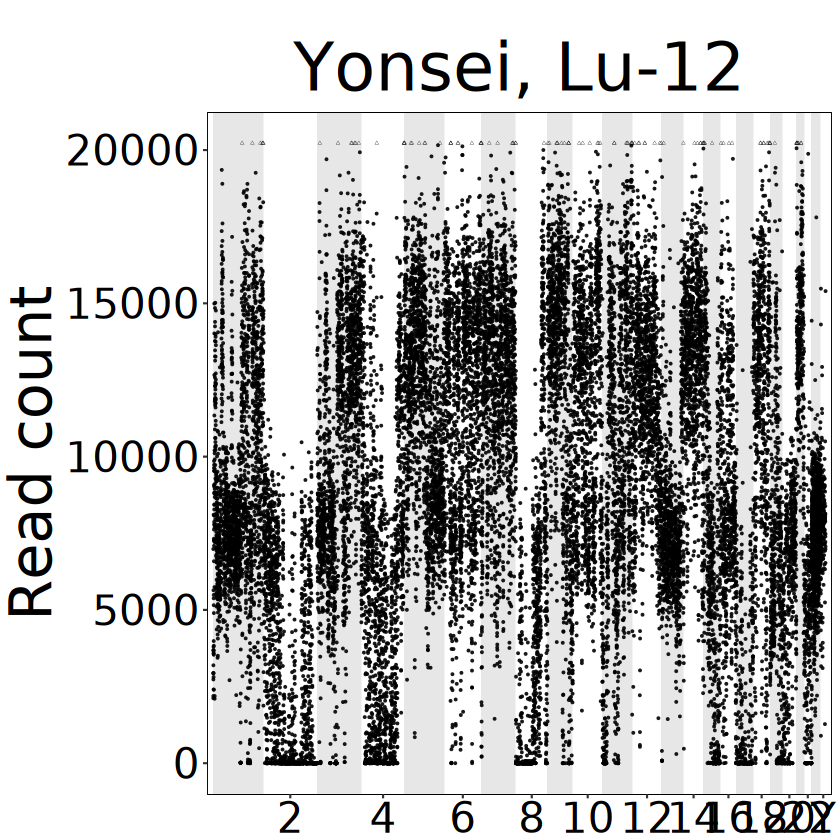

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


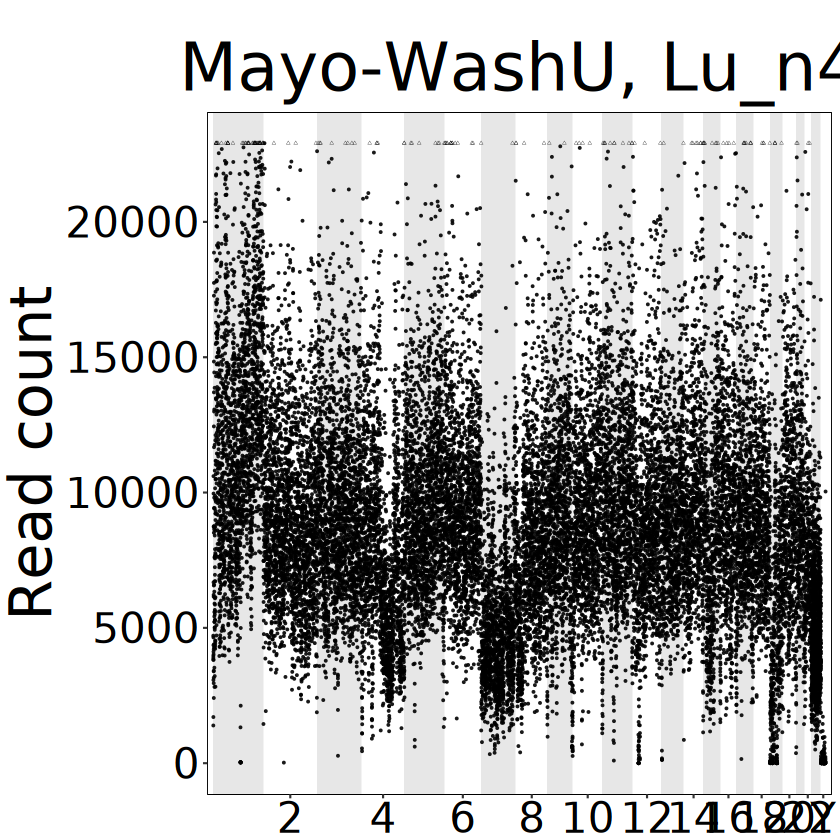

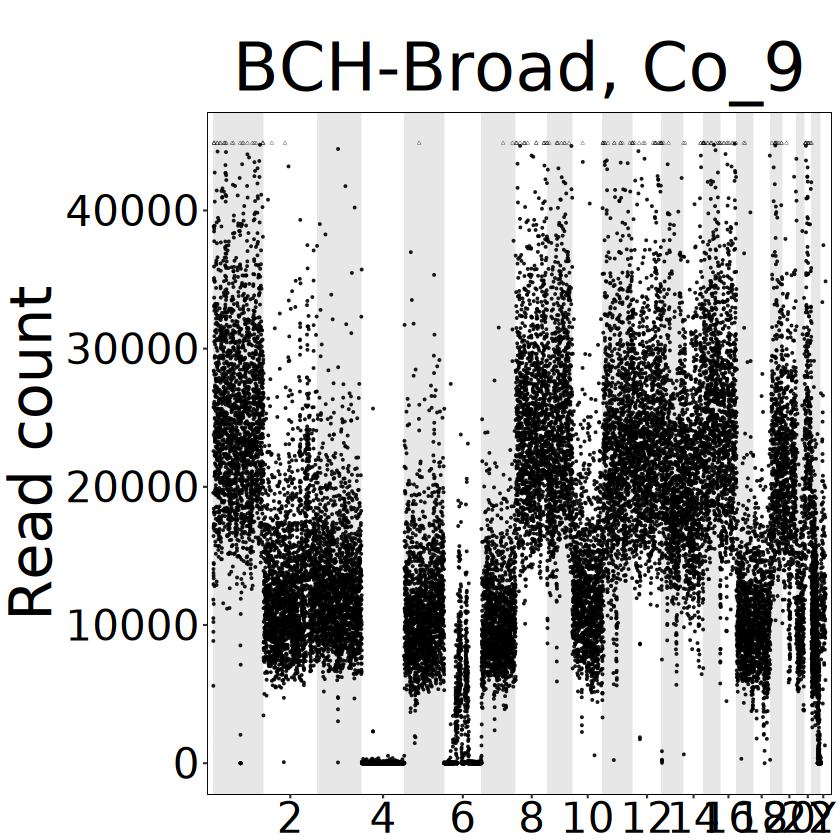

In [106]:
library(patchwork)
library(Cairo)
library(cowplot)

for (cell_name in milovan_qc_fail_cell_names) {
      cell_info <- cells_with_cnv[cells_with_cnv$cell_name == cell_name,]
      tissue <- sample_id_metadata_df %>% filter(up_id_header==cell_name) %>% pull(tissue)
      plot_title <- sample_id_metadata_df %>% filter(up_id_header==cell_name) %>% pull(sample_name)
      batch_name <- batch_name_list[[tissue]]
      
      p <- plot_cell2_supplementary2_qc_fail_scan2(
        cell_name,
        plot_title,
        cell_data_scan2,
        seg_merged_data_orig,
        cnv_presence = NULL,
        output_dir = "milovan_qc_fail_cells2",
        print_plot = TRUE,
        chrom_list = c(1:22, "X", "Y")
      )
      
    }

In [109]:
library(patchwork)
library(Cairo)
library(ggplot2)
library(dplyr)

output_dir <- "cell_plots_final"
dir.create(output_dir, showWarnings = FALSE)

# === CNV Colors ===
category_colors <- c(
  "Aneuploidy"  = "#F0E442",  
  "CN-LOH"      = "#009E73",  
  "Deletion"    = "#56B4E9",  
  "Duplication" = "#D55E00"
)

# === Legend builder (legend-only plot) ===
make_cnv_legend_plot <- function(category_colors) {
  df <- data.frame(category = names(category_colors))
  
  ggplot(df, aes(x = category, fill = category)) +
    geom_bar(aes(y = 1), width = 0, stat = "identity") +  # invisible bars
    scale_fill_manual(values = category_colors, name = "CNV Type") +
    guides(
      fill = guide_legend(
        nrow = 1,
        byrow = TRUE,
        keywidth = unit(4, "mm"),
        keyheight = unit(4, "mm"),
        label.position = "bottom",
        title.position = "top",
        title.hjust = 0.5
      )
    ) +
    theme_void() +
    theme(
      legend.position = "bottom",
      legend.title = element_text(size = 9, face = "bold"),
      legend.text = element_text(size = 8),
      legend.spacing.x = unit(1, "mm"),
      legend.margin = margin(t = 0, b = 0),
      panel.spacing = unit(0, "mm")
    )
}

cnv_legend_plot <- make_cnv_legend_plot(category_colors)

# === Main loop over cell types ===
for (cell_type_curr in unique(cell_data_orig$cell_type)) {
  
  ordered_cells <- cells_with_cnv %>%
    filter(cell_type == cell_type_curr) %>%
    pull(cell_name)
  
  plots <- list()
  
  for (cell_name in ordered_cells) {
    
    cell_info <- cells_with_cnv %>% filter(cell_name == !!cell_name)
    sample_row <- sample_id_metadata_df %>% filter(up_id_header == !!cell_name)
    if (nrow(sample_row) == 0) next
    
    tissue <- sample_row$tissue[1]
    plot_title <- sample_row$sample_name[1]
    batch_name <- batch_name_list[[tissue]]
    
    cnv_presence <- tibble(
      category = c("Aneuploidy", "CN-LOH", "Deletion", "Duplication"),
      present  = c(cell_info$has_aneuploidy, cell_info$has_CNLOH,
                   cell_info$has_DEL, cell_info$has_DUP)
    ) %>% filter(present)
    
    p <- plot_cell2_supplementary2(
      cell_name = cell_name,
      title = plot_title,
      cell_data = cell_data_orig,
      seg_merged_data = seg_merged_data_orig,
      cnv_presence = cnv_presence,
      output_dir = NULL,
      print_plot = FALSE,
      chrom_list = c(1:22, "X", "Y")
    )
    
    # Combine RDR and BAF for each cell
    plots[[cell_name]] <- p$rdr / plot_spacer() / p$baf +
      plot_layout(heights = c(1, 0.05, 1))
  }
  
  if (length(plots) == 0) next
  
  # Arrange plots in grid (3 columns)
  grid_plot <- wrap_plots(plots, ncol = 3)
  
  # Add legend underneath, minimal height
  final_grid <- grid_plot / cnv_legend_plot +
    plot_layout(heights = c(1, 0.08))  # cell plots tall, legend small
  
  # Save to PDF
  pdf_file <- file.path(
    output_dir,
    paste0(
      cell_type_curr, "_cells_grid",
      "_cell-filter_", cell_set_to_use,
      "_length-filter_", if (is.null(length_filter)) "NULL" else as.character(length_filter),
      ".pdf"
    )
  )
  
  CairoPDF(pdf_file, width = 8.5, height = 11)
  print(final_grid)
  dev.off()
}


Warning message:
“Removed 289 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 286 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 286 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 286 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 290 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 292 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 289 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 294 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 274 rows containing missing values or values outside the scale

In [125]:
library(patchwork)
library(Cairo)
library(ggplot2)
library(dplyr)
library(gridExtra)
library(grid)
library(gtable)

output_dir <- "cell_plots_final"
dir.create(output_dir, showWarnings = FALSE)

# === CNV Colors ===
category_colors <- c(
  "Aneuploidy"  = "#F0E442",  
  "CN-LOH"      = "#009E73",  
  "Deletion"    = "#56B4E9",  
  "Duplication" = "#D55E00"
)

ncol_grid <- 3  # number of columns in grid

# === Tight horizontal CNV legend function ===
make_cnv_legend_table_tight <- function(category_colors,
                                        square_size = unit(4, "mm"),
                                        spacing = unit(1, "mm")) {
  # Bold label first
  label_grob <- textGrob("CNV type:", gp = gpar(fontface = "bold", fontsize = 10))
  
  # Grobs for each CNV type
  item_grobs <- lapply(seq_along(category_colors), function(i) {
    square <- rectGrob(width = square_size, height = square_size,
                       gp = gpar(fill = category_colors[i], col = "black"))
    text <- textGrob(names(category_colors)[i], x = 0, just = "left", gp = gpar(fontsize = 10))
    
    # Combine square + spacing + text horizontally
    g <- gtable(widths = unit.c(square_size, spacing, grobWidth(text)),
                heights = unit(1, "null"))
    g <- gtable_add_grob(g, square, t = 1, l = 1)
    g <- gtable_add_grob(g, text, t = 1, l = 3)
    g
  })
  
  # Combine label + all items in one row
  all_grobs <- c(list(label_grob), item_grobs)
  legend_grob <- arrangeGrob(grobs = all_grobs, nrow = 1,
                             widths = unit(rep(1, length(all_grobs)), "null"))
  legend_grob
}

# === Main loop over cell types ===
for (cell_type_curr in unique(cell_data_orig$cell_type)) {
  
  ordered_cells <- cells_with_cnv %>%
    filter(cell_type == cell_type_curr) %>%
    pull(cell_name)
  
  plots <- list()
  
  for (cell_name in ordered_cells) {
    
    cell_info <- cells_with_cnv %>% filter(cell_name == !!cell_name)
    sample_row <- sample_id_metadata_df %>% filter(up_id_header == !!cell_name)
    if (nrow(sample_row) == 0) next
    
    tissue <- sample_row$tissue[1]
    plot_title <- sample_row$sample_name[1]
    batch_name <- batch_name_list[[tissue]]
    
    cnv_presence <- tibble(
      category = c("Aneuploidy", "CN-LOH", "Deletion", "Duplication"),
      present  = c(cell_info$has_aneuploidy, cell_info$has_CNLOH,
                   cell_info$has_DEL, cell_info$has_DUP)
    ) %>% filter(present)
    
    p <- plot_cell2_supplementary2(
      cell_name = cell_name,
      title = plot_title,
      cell_data = cell_data_orig,
      seg_merged_data = seg_merged_data_orig,
      cnv_presence = cnv_presence,
      output_dir = NULL,
      print_plot = FALSE,
      chrom_list = c(1:22, "X", "Y")
    )
    
    plots[[cell_name]] <- p$rdr / plot_spacer() / p$baf +
      plot_layout(heights = c(1, 0.05, 1))
  }
  
  if (length(plots) == 0) next
  
  # === Legend grob ===
  legend_grob <- make_cnv_legend_table_tight(category_colors)
  legend_plot <- wrap_elements(legend_grob)
  
  # === Determine empty cells in last row ===
  total_plots <- length(plots)
  n_empty <- ncol_grid - (total_plots %% ncol_grid)
  if (n_empty == ncol_grid) n_empty <- 0
  
  if (n_empty >= 2) {
    # Enough space: place legend inline in last row
    # Use only one empty slot for legend, rest spacers
    dummy_plots <- vector("list", n_empty)
    dummy_plots[[1]] <- legend_plot
    if (n_empty > 1) {
      for (i in 2:n_empty) dummy_plots[[i]] <- plot_spacer()
    }
    plots <- c(plots, dummy_plots)
    grid_plot <- wrap_plots(plots, ncol = ncol_grid)
  } else {
    # Not enough space: put legend below all plots
    grid_plot <- wrap_plots(plots, ncol = ncol_grid)
    grid_plot <- grid_plot / legend_plot + plot_layout(heights = c(1, 0.08))
  }
  
  # Save to PDF
  pdf_file <- file.path(
    output_dir,
    paste0(
      cell_type_curr, "_cells_grid",
      "_cell-filter_", cell_set_to_use,
      "_length-filter_", if (is.null(length_filter)) "NULL" else as.character(length_filter),
      ".pdf"
    )
  )
  
  CairoPDF(pdf_file, width = 8.5, height = 11)
  print(grid_plot)
  dev.off()
}



Warning message:
“Removed 289 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 286 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 286 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 286 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 290 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 292 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 289 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 294 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 274 rows containing missing values or values outside the scale

In [ ]:
source("../notebooks_filter/utils_high-depth.R")

In [ ]:
prefix

In [ ]:
cell_name

In [ ]:
batch_name

In [ ]:
cells_with_cnv <- merge(cells_with_cnv, cell_data_orig %>% 
                        group_by(cell_name) %>% 
                        summarize(cell_name=cell_name[1], cell_type=cell_type[1]) %>% ungroup(), by="cell_name")

In [ ]:
head(cells_with_cnv)

In [ ]:
nrow(cells_with_cnv)

In [ ]:
source("../notebooks_filter/utils_high-depth.R")

In [ ]:
library(patchwork)
library(Cairo)

for (cell_type_curr in unique(cell_data_orig$cell_type)){
    # Collect all your plots in a list
    plots <- list()
    
    cell_data_with_site <- merge(cell_data_orig, site_df %>% select(cell_name, site_name), by="cell_name")
    cell_data_with_site <- cell_data_with_site %>% filter(cell_type==cell_type_curr)
    ordered_cells <- cells_with_cnv %>%
      filter(cell_type==cell_type_curr) %>%
      arrange(site_name) %>%        # order by site
      pull(cell_name)
    
    
    for (cell_name in ordered_cells) {
      cell_info <- cells_with_cnv[cells_with_cnv$cell_name == cell_name,]
      
      cnv_presence <- tibble(
        category = c("Aneuploidy", "CN-LOH", "Deletion", "Duplication"),
        present = c(cell_info$has_aneuploidy, cell_info$has_CNLOH, cell_info$has_DEL, cell_info$has_DUP)
      ) %>% filter(present)
      
      p <- plot_cell2_supplementary(
        cell_name,
        NULL,
        cell_data_with_site,
        seg_merged_data_orig,
        cnv_presence = cnv_presence,
        output_dir = "cell_plots_final",
        print_plot = FALSE,
        chrom_list = c(1:22, "X", "Y")
      )
      
      plots[[cell_name]] <- p
    }
    
    # Arrange plots in a grid: e.g., 3 columns
    grid_plot <- wrap_plots(plots, ncol = 3)
    
    # Save to PDF 
    CairoPDF(file.path(output_dir, paste0(cell_type_curr, "_cells_grid", 
                                        "_cell-filter_", cell_set_to_use, 
                                        "_length-filter_", if (is.null(length_filter)) "NULL" else as.character(length_filter), 
                                            ".pdf")), width = 8.5, height = 11)
    print(grid_plot)
    dev.off()
}

In [ ]:
head(cell_data_with_site)

In [ ]:
seg_merged_data %>% filter(chrom %in% c("X", "Y"))

In [ ]:
cnv_barchart_df <- seg_merged_data %>%
group_by(cell_name, cell_type) %>%
summarize(
    num_CNVs = sum(is_CNV | is_aneuploid, na.rm = TRUE),
    has_CNV = num_CNVs > 0,
    num_aneuploidies = sum(is_aneuploid, na.rm=TRUE),
    has_aneuploidy = num_aneuploidies > 0,
    num_DEL = sum(is_loss, na.rm=TRUE),
    has_DEL = num_DEL > 0,
    num_DUP = sum(is_gain, na.rm=TRUE),
    has_DUP = num_DUP > 0,
    num_CNLOH = sum(chrom %in% c(1:22) & CN_total==2 & CN != "1|1"),
    has_CNLOH = num_CNLOH > 0,
    .groups = "drop"
  )

In [ ]:
seg_merged_data %>% filter(chrom=="X", is_CNV)

In [ ]:
seg_merged_data %>% filter(chrom=="X", !is_CNV)

In [ ]:
split_segment_by_arm <- function(row, arm_df) {
  seg_chrom <- row$chrom
  seg_start <- row$start
  seg_end <- row$end
  
  arms <- arm_df %>% filter(chrom == seg_chrom)
  
  # Which arms does this segment overlap?
  overlapping_arms <- arms %>%
    filter(start < seg_end & end > seg_start)
  
  if (nrow(overlapping_arms) == 1) {
    # Fully within one arm
    row$arm <- overlapping_arms$arm[1]
    row$overlap_start <- seg_start
    row$overlap_end <- seg_end
    return(row)
  } else if (nrow(overlapping_arms) == 2) {
    # Spans both arms — split
    rows <- list()
    for (i in 1:2) {
      arm_name <- overlapping_arms$arm[i]
      arm_start <- overlapping_arms$start[i]
      arm_end <- overlapping_arms$end[i]
      
      new_row <- row
      new_row$arm <- arm_name
      new_row$overlap_start <- max(seg_start, arm_start)
      new_row$overlap_end <- min(seg_end, arm_end)
      rows[[i]] <- new_row
    }
    return(bind_rows(rows))
  } else {
    # No overlap? should not happen
    return(NULL)
  }
}


In [ ]:
seg_arm_df <- seg_merged_data %>%
  split(., seq_len(nrow(.))) %>%
  map_dfr(~split_segment_by_arm(.x, chrom_arm_df))


In [ ]:
seg_arm_df <- seg_arm_df %>%
  mutate(overlap_length = overlap_end - overlap_start)

arm_cnv_summary_df <- seg_arm_df %>%
  filter(chrom %in% c(1:22)) %>%
  group_by(cell_name, cell_type, chrom, arm) %>%
  summarize(
    arm_diploid_dna = sum(overlap_length),
    arm_dna = sum(is_CNV * CN_total * overlap_length + (1 - is_CNV) * 2 * overlap_length),
    arm_ploidy = arm_dna / arm_diploid_dna,
    arm_gain_coverage_length = sum(is_gain * overlap_length),
    arm_loss_coverage_length = sum(is_loss * overlap_length),
    arm_gain_coverage = arm_gain_coverage_length / arm_diploid_dna,
    arm_loss_coverage = arm_loss_coverage_length / arm_diploid_dna,
    .groups = "drop"
  )


In [ ]:
head(arm_cnv_summary_df)

In [ ]:
ggplot(arm_cnv_summary_df, aes(x=arm_ploidy)) + geom_histogram()

In [ ]:
head(autosomal_cnv_chrom_summary_df)

In [ ]:
cell_autosomal_cnv_chrom_summary_df <- autosomal_cnv_chrom_summary_df %>%
group_by(cell_type, cell_name) %>%
summarize(
    max_chromosome_gain = max(chrom_ploidy),
    max_chromosome_loss = min(chrom_ploidy),
    max_chromosome_cnv = if (2-max_chromosome_loss>max_chromosome_gain-2) max_chromosome_loss else max_chromosome_gain)

In [ ]:
cell_autosomal_cnv_arm_summary_df <- arm_cnv_summary_df %>%
group_by(cell_type, cell_name) %>%
summarize(
    max_arm_gain = max(arm_ploidy),
    max_arm_loss = min(arm_ploidy),
    max_arm_cnv = if (2-max_arm_loss>max_arm_gain-2) max_arm_loss else max_arm_gain,
    max_arm_gain_coverage = max(arm_gain_coverage),
    max_arm_loss_coverage = max(arm_loss_coverage),
    max_arm_cnv_coverage = max(max_arm_gain_coverage, max_arm_loss_coverage)
        )

In [ ]:
head(cell_autosomal_cnv_chrom_summary_df)

In [ ]:
head(cell_autosomal_cnv_arm_summary_df)

In [ ]:
ggplot(cell_autosomal_cnv_arm_summary_df %>% filter(max_arm_cnv != 2), aes(x=max_arm_cnv)) + geom_histogram()

In [ ]:
ggplot(cell_autosomal_cnv_arm_summary_df %>% filter(max_arm_cnv != 2), aes(x=max_arm_cnv_coverage)) + geom_histogram()

In [ ]:
cell_autosomal_cnv_arm_summary_df %>% filter(max_arm_cnv != 2)

# 3 CNV groups: arm-level aneuploidy ; CN-LOH only ; neither but has CNV

In [ ]:
cell_data$CN_signal <- cell_data$RDR * cell_data$gamma

## Arm-level aneuploidy

In [ ]:
arm_level_aneuploidy_df <- cell_autosomal_cnv_arm_summary_df %>% filter(max_arm_cnv_coverage==1)
arm_level_aneuploidy_df

In [ ]:
for (cell_name in arm_level_aneuploidy_df$cell_name){
    plot_cell(cell_name, cell_name, cell_data, seg_merged_data, output_dir="autosomal_aneuploidy_cells")    
}

## CN-LOH only

In [ ]:
cnloh_df <- autosomal_cnv_summary_df %>% filter(num_gains == 0, num_losses == 0, num_LOH >= 1)
cnloh_df

In [ ]:
for (cell_name in cnloh_df$cell_name){
    plot_cell(cell_name, cell_name, cell_data, seg_merged_data, output_dir="cnloh_cells")    
}

## Non-aneuploid, non-CN-LOH CNV cells

In [ ]:
other_cnv_df <- autosomal_cnv_summary_df %>% filter(num_gains + num_losses >= 1, !(cell_name %in% arm_level_aneuploidy_df$cell_name))
other_cnv_df

In [ ]:
for (cell_name in other_cnv_df$cell_name){
    plot_cell(cell_name, cell_name, cell_data, seg_merged_data, output_dir="other_cnv_cells")    
}

# Barplot of different CNV-type cells over cell type

In [ ]:
cell_barplot_summary_df <- cell_autosomal_cnv_chrom_summary_df %>% group_by(cell_type) %>% summarize(num_cells=n(), 
                                                                          num_aneuploidy=sum(cell_name %in% arm_level_aneuploidy_df$cell_name), 
                                                                          frac_aneuploidy=num_aneuploidy/num_cells,
                                                                          num_CN_LOH_only_cells=sum(cell_name %in% cnloh_df$cell_name),
                                                                          frac_CN_LOH_only_cells = num_CN_LOH_only_cells / num_cells,
                                                                          num_other_CNV_cells=sum(cell_name %in% other_cnv_df$cell_name),
                                                                          frac_other_CNV_cells = num_other_CNV_cells / num_cells                           
                                                                                                    )

In [ ]:
cell_barplot_summary_df

In [ ]:
df <- cell_barplot_summary_df %>%
  mutate(num_no_CNV = num_cells - (num_aneuploidy + num_CN_LOH_only_cells + num_other_CNV_cells))

df_frac_long <- df %>%
  select(cell_type, num_cells, num_aneuploidy, num_CN_LOH_only_cells, num_other_CNV_cells, num_no_CNV) %>%
  mutate(
    num_no_CNV = num_cells - (num_aneuploidy + num_CN_LOH_only_cells + num_other_CNV_cells)
  ) %>%
  pivot_longer(
    cols = c(num_aneuploidy, num_CN_LOH_only_cells, num_other_CNV_cells, num_no_CNV),
    names_to = "category",
    values_to = "count"
  ) %>%
  mutate(
    fraction = count / num_cells,
    category = factor(
      category,
      levels = c("num_no_CNV", "num_CN_LOH_only_cells", "num_aneuploidy", "num_other_CNV_cells"),
      labels = c("No CNV", "CN-LOH only", "Arm-level aneuploidy", "Other CNV")
    )
  )


In [ ]:
ggplot(df_frac_long, aes(x = cell_type, y = fraction, fill = category)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Set2", name = "Cell category") +
  labs(
    title = "Proportion of CNV events per cell type",
    x = "Cell Type",
    y = "Fraction of Cells"
  ) +
  theme_minimal(base_size = 14) +
  scale_y_continuous(labels = scales::percent_format())


In [ ]:
df <- cell_barplot_summary_df %>%
  mutate(num_no_CNV = num_cells - (num_aneuploidy + num_CN_LOH_only_cells + num_other_CNV_cells))

# Reshape to long format
df_long <- df %>%
  select(cell_type, num_aneuploidy, num_CN_LOH_only_cells, num_other_CNV_cells, num_no_CNV) %>%
  pivot_longer(
    cols = -cell_type,
    names_to = "category",
    values_to = "count"
  ) %>%
  mutate(
    category = factor(category, levels = c("num_no_CNV", "num_CN_LOH_only_cells", "num_aneuploidy", "num_other_CNV_cells"),
                      labels = c("No CNV", "CN-LOH only", "Arm-level aneuploidy", "Other CNV"))
  )

In [ ]:
df_pie_frac <- df %>%
  mutate(
    num_CNV = num_aneuploidy + num_CN_LOH_only_cells + num_other_CNV_cells,
    num_no_CNV = num_cells - num_CNV
  ) %>%
  select(cell_type, num_CNV, num_no_CNV, num_cells) %>%
  pivot_longer(cols = c(num_CNV, num_no_CNV),
               names_to = "category",
               values_to = "count") %>%
  mutate(
    category = factor(category, levels = c("num_no_CNV", "num_CNV"),
                      labels = c("No CNV", "Any CNV")),
    fraction = count / num_cells
  )


In [ ]:
df_cnv <- df %>%
  select(cell_type, num_aneuploidy, num_CN_LOH_only_cells, num_other_CNV_cells) %>%
  pivot_longer(cols = -cell_type, names_to = "category", values_to = "count") %>%
  mutate(
    category = factor(category,
      levels = c("num_CN_LOH_only_cells", "num_aneuploidy", "num_other_CNV_cells"),
      labels = c("CN-LOH only", "Arm-level aneuploidy", "Other CNV")
    )
  )


In [ ]:
library(ggplot2)
library(patchwork)

df_pie_frac <- df_pie_frac %>%
  group_by(cell_type) %>%
  mutate(
    pos = cumsum(fraction) - fraction / 2,
    label = scales::percent(fraction, accuracy = 1)
  )

p_pie <- ggplot(df_pie_frac, aes(x = "", y = fraction, fill = category)) +
  geom_bar(stat = "identity", width = 1) +
  geom_text(aes(label = label, y = pos), color = "black", size = 3) +
  coord_polar(theta = "y") +
  facet_wrap(~cell_type, nrow = 1) +
  scale_fill_brewer(palette = "Pastel1", name = "CNV status") +
  theme_void(base_size = 14) +
  labs(title = "Proportion of CNV status per cell type")


In [ ]:
p_bar <- ggplot(df_cnv, aes(x = cell_type, y = count, fill = category)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.7), width = 0.6) +
  scale_fill_brewer(palette = "Set2", name = "CNV category") +
  labs(title = "CNV subtypes among CNV-positive cells", y = "Number of cells", x = "Cell type") +
  theme_minimal(base_size = 14)


In [ ]:
cnv_type_plot <- p_pie / p_bar + plot_layout(heights = c(1, 1.2))
print(cnv_type_plot)
ggsave("cnv_type_plot.png", cnv_type_plot)

In [ ]:
other_cnv_full_df <- seg_merged_data %>% filter(is_CNV, cell_name %in% other_cnv_df$cell_name, chrom %in% c(1:22))

In [ ]:
head(other_cnv_full_df)

In [ ]:
library(ggplot2)
library(dplyr)

plot_mirrored_histogram_max_cell <- function(seg_merged_data_CNV, title = NULL) {
    title_fontsize=20
    xaxis_title_fontsize=16
    yaxis_title_fontsize=16
    xaxis_label_fontsize=14
    yaxis_label_fontsize=14
    
    df <- seg_merged_data_CNV %>%
        filter(is_CNV) %>%
        group_by(cell_name) %>%
        filter(is_gain) %>%
        summarize(
          is_gain = is_gain[1],
          length_Mb = max(length) / 1e6,
          CNA_type = "Gain")
        
     df_neg <- seg_merged_data_CNV %>%
        filter(is_CNV) %>%
        group_by(cell_name) %>%
        filter(!is_gain) %>%
        summarize(
          is_gain = is_gain[1],
          length_Mb = max(length) / 1e6,
          CNA_type = "Loss")

    df <- rbind(df, df_neg)
    
    ggplot() +
    # Gain histogram (positive y)
    geom_histogram(
      data = df %>% filter(is_gain),
      aes(x = length_Mb, y = ..count..),
      fill = "#E64B35FF",
      bins = 30,
      position = "identity",
      color = "black"
    ) +
    # Loss histogram (negative y)
    geom_histogram(
      data = df %>% filter(!is_gain),
      aes(x = length_Mb, y = -..count..),
      fill = "#4DBBD5FF",
      bins = 30,
      position = "identity",
      color = "black"
    ) +
    #scale_y_continuous(
    #  breaks = c(-3, -2, -1, 0, 1, 2, 3, 4, 5),
    #  limits = c(-3, 5)
    #) +
    geom_hline(yintercept = 0, color = "black") +
    ylab("Count of CNAs") +
    xlab("Max +/- CNA length per cell (Mb)") +
    ggtitle(title) +
    theme_minimal() +
    theme(
      axis.text.y = element_text(color = "black", size=yaxis_label_fontsize),
      axis.title.y = element_text(color = "black", size=yaxis_title_fontsize),
      axis.text.x = element_text(color = "black", angle = 90, hjust = 1, vjust = 0.5, size=xaxis_label_fontsize),
      axis.title.x = element_text(color = "black", size=xaxis_title_fontsize),
      panel.grid.minor = element_blank(),
      panel.grid.major.x = element_blank(),
      plot.title = element_text(hjust = 0.5, size=title_fontsize)
    )
}


In [ ]:
plot_mirrored_histogram_max_cell(other_cnv_full_df, title = NULL) 

In [ ]:
boxplot <- ggplot(other_cnv_full_df, aes(x=cell_name, group=cell_name, y=length)) + geom_boxplot() + geom_point(aes(color=is_loss)) + theme_minimal() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [ ]:
print(boxplot)

In [ ]:
ggsave("boxplot.png", boxplot)

In [ ]:
num_cnv_df <- other_cnv_full_df %>% group_by(cell_name) %>% summarize(num_CNV=n(), max_cnv_length=max(length), median_cnv_length=median(length))

In [ ]:
num_cnv_df

In [ ]:
ggplot(num_cnv_df, aes(x=num_CNV)) + geom_histogram()

In [ ]:
ggplot(num_cnv_df, aes(x=num_CNV, y=median_cnv_length)) + geom_point()

In [ ]:
df_summary <- df %>%
  mutate(
    num_CNV = num_aneuploidy + num_CN_LOH_only_cells + num_other_CNV_cells,
    num_no_CNV = num_cells - num_CNV
  ) %>%
  select(cell_type, num_CNV, num_no_CNV) %>%
  pivot_longer(cols = c(num_no_CNV, num_CNV), names_to = "category", values_to = "count") %>%
  mutate(category = factor(category, levels = c("num_no_CNV", "num_CNV"),
                           labels = c("No CNV", "Any CNV")))


In [ ]:
p1 <- ggplot(df_summary, aes(x = cell_type, y = count, fill = category)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.6), width = 0.5) +
  scale_fill_brewer(palette = "Pastel1", name = "Category") +
  labs(title = "CNV presence by cell type", y = "Number of Cells", x = "Cell Type") +
  theme_minimal(base_size = 14)


In [ ]:
df_cnv_only <- df %>%
  select(cell_type, num_aneuploidy, num_CN_LOH_only_cells, num_other_CNV_cells) %>%
  pivot_longer(cols = -cell_type, names_to = "category", values_to = "count") %>%
  mutate(category = factor(category,
    levels = c("num_CN_LOH_only_cells", "num_aneuploidy", "num_other_CNV_cells"),
    labels = c("CN-LOH only", "Arm-level aneuploidy", "Other CNV")
  ))

p2 <- ggplot(df_cnv_only, aes(x = cell_type, y = count, fill = category)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.6), width = 0.5) +
  scale_fill_brewer(palette = "Set2", name = "CNV Category") +
  labs(title = "CNV types among CNV-positive cells", y = "Number of Cells", x = "Cell Type") +
  theme_minimal(base_size = 14)


In [ ]:
library(patchwork)
p1 / p2 + plot_layout(heights = c(1, 1))


In [ ]:
df_long_counts <- df %>%
  select(cell_type, num_aneuploidy, num_CN_LOH_only_cells, num_other_CNV_cells, num_no_CNV) %>%
  pivot_longer(
    cols = -cell_type,
    names_to = "category",
    values_to = "count"
  ) %>%
  mutate(
    category = factor(category, levels = c("num_no_CNV", "num_CN_LOH_only_cells", "num_aneuploidy", "num_other_CNV_cells"),
                      labels = c("No CNV", "CN-LOH only", "Arm-level aneuploidy", "Other CNV"))
  )

ggplot(df_long_counts, aes(x = cell_type, y = count, fill = category)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.7), width = 0.6) +
  scale_fill_brewer(palette = "Set2", name = "Cell category") +
  labs(
    title = "Number of cells by CNV category and cell type",
    x = "Cell Type",
    y = "Number of Cells"
  ) +
  theme_minimal(base_size = 14)


In [ ]:
ggplot(df_long, aes(x = cell_type, y = count, fill = category)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Set2", name = "Cell category") +
  labs(
    title = "Cell composition by CNV and aneuploidy status",
    x = "Cell Type",
    y = "Number of Cells"
  ) +
  theme_minimal(base_size = 14)


In [ ]:
ggplot(cell_autosomal_cnv_chrom_summary_df, aes(x=max_chromosome_loss)) + geom_histogram()

In [ ]:
ggplot(cell_autosomal_cnv_chrom_summary_df, aes(x=max_chromosome_gain)) + geom_histogram()

In [ ]:
cell_autosomal_cnv_chrom_summary_df[abs(cell_autosomal_cnv_chrom_summary_df$max_chromosome_cnv-2)>0.25,]

In [ ]:
cell_data$CN_signal <- cell_data$RDR*cell_data$gamma

In [ ]:
for (cell_name in cell_autosomal_cnv_chrom_summary_df$cell_name[abs(cell_autosomal_cnv_chrom_summary_df$max_chromosome_cnv-2)>0.25]){
    plot_cell(cell_name, cell_name, cell_data, seg_merged_data, output_dir="autosomal_aneuploidy_cells")    
}

In [ ]:
ggplot(autosomal_cnv_chrom_summary_df, aes(x=chrom_ploidy)) + geom_histogram()

In [ ]:
ggplot(autosomal_cnv_chrom_summary_df %>% filter(autosomal_cnv_chrom_summary_df$chrom_ploidy != 2), aes(x=chrom_ploidy)) + geom_histogram()

In [ ]:
cell_type_autosomal_cnv_summary_df <- autosomal_cnv_summary_df %>% 
group_by(cell_type) %>% 
summarize(
    total_cells = n(), 
    num_cells_with_CNV = sum(num_CNVs>0),
    frac_cells_with_CNV = mean(num_CNVs>0),
    num_cells_with_gain = sum(num_gains>0),
    frac_cells_with_gain = mean(num_gains>0),
    num_cells_with_loss = sum(num_losses>0),
    frac_cells_with_loss = mean(num_losses>0),
    num_cells_with_gain_and_loss = sum(num_gains>0 & num_losses>0),
    frac_cells_with_gain_and_loss = mean(num_gains>0 & num_losses>0),
    num_cells_with_LOH = sum(num_LOH>0),
    frac_cells_with_LOH = mean(num_LOH>0)
)

In [ ]:
cell_type_autosomal_cnv_summary_df

In [ ]:
cell_autosomal_cnv_chrom_summary_df %>% group_by(cell_type) %>% summarize(num_cells=n(), 
                                                                          num_aneuploidy=sum(abs(max_chromosome_cnv-2)>0.25), 
                                                                          frac_aneuploidy=num_aneuploidy/num_cells)

In [ ]:
ggplot(autosomal_cnv_summary_df %>% filter(num_CNVs>0), aes(x=num_CNVs, fill=cell_type)) + geom_histogram(position="dodge")

In [ ]:
aneuploid_cell_names <- cell_autosomal_cnv_chrom_summary_df$cell_name[abs(cell_autosomal_cnv_chrom_summary_df$max_chromosome_cnv-2)>0.25]

In [ ]:
autosomal_cnv_summary_df %>% filter(cell_name %in% aneuploid_cell_names)

In [ ]:
autosomal_cnv_summary_df %>% filter(num_CNVs>0)

In [ ]:
ggplot(autosomal_cnv_summary_df %>% filter(num_CNVs>0, !(cell_name %in% aneuploid_cell_names)), aes(x=num_CNVs, fill=cell_type)) + geom_histogram(position="dodge")

In [ ]:
non_aneuploid_but_CNV_cells <- (autosomal_cnv_summary_df %>% filter(num_CNVs>0, !(cell_name %in% aneuploid_cell_names)))$cell_name

In [ ]:
for (cell_name in non_aneuploid_but_CNV_cells){
    plot_cell(cell_name, cell_name, cell_data, seg_merged_data, output_dir="non_aneuploid_CNV_cells")    
}

In [ ]:
cell_barplot_summary_df <- cell_autosomal_cnv_chrom_summary_df %>% group_by(cell_type) %>% summarize(num_cells=n(), 
                                                                          num_aneuploidy=sum(abs(max_chromosome_cnv-2)>0.25), 
                                                                          frac_aneuploidy=num_aneuploidy/num_cells,
                                                                          num_non_aneuploid_but_CNV_cells=sum(cell_name %in% non_aneuploid_but_CNV_cells),
                                                                          frac_non_aneuploid_but_CNV_cells = num_non_aneuploid_but_CNV_cells / num_cells)

In [ ]:
cell_barplot_summary_df

In [ ]:
cell_barplot_summary_df <- merge(cell_barplot_summary_df, cell_type_autosomal_cnv_summary_df)

In [ ]:
cell_barplot_summary_df

In [ ]:
df <- cell_barplot_summary_df %>%
  mutate(num_no_CNV = num_cells - (num_aneuploidy + num_non_aneuploid_but_CNV_cells))

# Reshape to long format
df_long <- df %>%
  select(cell_type, num_aneuploidy, num_non_aneuploid_but_CNV_cells, num_no_CNV) %>%
  pivot_longer(
    cols = -cell_type,
    names_to = "category",
    values_to = "count"
  ) %>%
  mutate(
    category = factor(category, levels = c("num_no_CNV", "num_non_aneuploid_but_CNV_cells", "num_aneuploidy"),
                      labels = c("No CNV", "CNV (no aneuploidy)", "Aneuploidy"))
  )

In [ ]:
ggplot(df_long, aes(x = cell_type, y = count, fill = category)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Set2", name = "Cell category") +
  labs(
    title = "Cell composition by CNV and aneuploidy status",
    x = "Cell Type",
    y = "Number of Cells"
  ) +
  theme_minimal(base_size = 14)


In [ ]:
ggplot(autosomal_cnv_summary_df %>% filter(num_CNVs>0), aes(x=max_CNV_length, fill=cell_type)) + geom_histogram(position="dodge")

In [ ]:
ggplot(seg_merged_data %>% filter(chrom %in% 1:22, is_CNV), aes(x=length)) + geom_histogram() 

In [ ]:
ggplot(autosomal_cnv_summary_df %>% filter(num_CNVs>0), aes(x=num_CNVs, fill=cell_type)) + geom_histogram(position="dodge")